# AIM : To plot the linear regression plots for Youtube Data (Globally & Country-Wise) and compare the values of regression coefficients country-wise

In [195]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [301]:
raw_data = pd.read_csv('YoutubeData.csv')
raw_data.head()

video_id trending_date  \
0  aaOB-ErYq6Y    2017-11-14   
1  XPrHD-7jjUs    2018-02-12   
2  UOgNUOKYXiA    2018-05-13   
3  W1LO7Zk_38o    2018-02-01   
4  BmEvz7tkoks    2018-01-14   

                                               title channel_title  \
0           Waymo's fully self-driving cars are here         Waymo   
1  This Hidden 300 Foot Stretch Of The Berlin Wal...     VICE News   
2  Durga | Full Ep 1068 | 11th May 2018 | Odia Se...     Tarang TV   
3  ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...  Sasha Sotnik   
4  Amlo canta Las MaÃ±anitas a su esposa, por su ...  Viral Pancho   

  publish_date  category_id publish_time  \
0   2017-11-07           28     16:03:12   
1   2018-02-05           25     17:15:48   
2   2018-05-12           24     06:00:01   
3   2018-01-29           25     16:00:05   
4   2018-01-13           27     23:36:07   

                                                tags   views  likes  dislikes  \
0  self-driving car|"waymo"|"self-driving"|"drive...  665232   6485       714   
1  300 foot|"VICE News Tonight"|"VICE News"|"Berl...   52637   1005        51   
2  tarang|"tarang tv"|"tarang tv online"|"tarang ...   87291    340        74   
3  Ð¶Ð¸Ð»ÑÐµ|"Ð²ÑÑÐµÐ»ÐµÐ½Ð¸Ðµ"|"Ð°Ð²Ð°ÑÐ¸Ð¹Ð...  139389  11135       954   
4  amlo|"pena nieto"|"elecciones 2018"|"politica ...   57778   3689        69   

   comment_count                                  thumbnail_link  \
0           2497  https://i.ytimg.com/vi/aaOB-ErYq6Y/default.jpg   
1            132  https://i.ytimg.com/vi/XPrHD-7jjUs/default.jpg   
2             31  https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg   
3           2903  https://i.ytimg.com/vi/W1LO7Zk_38o/default.jpg   
4            691  https://i.ytimg.com/vi/BmEvz7tkoks/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category_name  \
0  Waymo, which started as the Google self-drivin...  Science & Technology   
1  The Berlin Wall was the ultimate symbol of the...       News & Politics   
2  Durga: Story of a revengeful daughter who ente...         Entertainment   
3  ÐÑÐ°Ð¶Ð´Ð°Ð½Ðµ Ð Ð¾ÑÑÐ¸Ð¸ Ð¿ÑÐ¾Ð´Ð¾Ð»Ð¶Ð°...       News & Politics   
4  Mexico va a votar por amlo por las propuestas ...             Education   

         region  
0  Great Britan  
1  Great Britan  
2         India  
3        Russia  
4        Mexico

In [302]:
#Creating a column for number of days taken to trend
raw_data['publish_date']=pd.to_datetime(raw_data['publish_date'],format='%Y-%m-%d')
raw_data['trending_date']=pd.to_datetime(raw_data['trending_date'],format='%Y-%m-%d')
raw_data['timetotrend'] = (raw_data['trending_date']-raw_data['publish_date']).dt.days

In [303]:
#Creating a column for the hour video was uploaded on
time = pd.to_datetime(raw_data['publish_time'])
raw_data['hour'] = time.dt.hour

In [304]:
#Creating a new column which tells us the number of tags that the video has. 
raw_data['tag_counts'] = raw_data['tags'].str.split("|").apply(len)

In [305]:
#Mapping boolean to integer
raw_data.comments_disabled = raw_data.comments_disabled.astype(int)
raw_data.ratings_disabled = raw_data.ratings_disabled.astype(int)
raw_data.video_error_or_removed = raw_data.video_error_or_removed.astype(int)

In [306]:
#KEEPING THE VARIBALES OF INTEREST
df = raw_data.drop(['video_id' , 'trending_date' , 'channel_title' , 'publish_date' ,
                      'publish_time' ,'tags' , 'thumbnail_link' , 'description' , 'category_name'] , axis=1)

In [8]:
df.head()

title  category_id   views  \
0           Waymo's fully self-driving cars are here           28  665232   
1  This Hidden 300 Foot Stretch Of The Berlin Wal...           25   52637   
2  Durga | Full Ep 1068 | 11th May 2018 | Odia Se...           24   87291   
3  ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...           25  139389   
4  Amlo canta Las MaÃ±anitas a su esposa, por su ...           27   57778   

   likes  dislikes  comment_count  comments_disabled  ratings_disabled  \
0   6485       714           2497                  0                 0   
1   1005        51            132                  0                 0   
2    340        74             31                  0                 0   
3  11135       954           2903                  0                 0   
4   3689        69            691                  0                 0   

   video_error_or_removed        region  timetotrend  hour  tag_counts  
0                       0  Great Britan            7    16          14  
1                       0  Great Britan            7    17          44  
2                       0         India            1     6          15  
3                       0        Russia            3    16          40  
4                       0        Mexico            1    23           6

# PRE-PROCESSING DATA

### Exploring the descriptive statistics of the variables

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include='all') #to include non-numeric data also

title  category_id  \
count                                              375942    375942.00   
unique                                             188646          nan   
top     Mission: Impossible - Fallout (2018) - Officia...          nan   
freq                                                  100          nan   
mean                                                  NaN        20.23   
std                                                   NaN         7.13   
min                                                   NaN         1.00   
25%                                                   NaN        17.00   
50%                                                   NaN        23.00   
75%                                                   NaN        24.00   
max                                                   NaN        44.00   

              views      likes   dislikes  comment_count  comments_disabled  \
count     375942.00  375942.00  375942.00      375942.00          375942.00   
unique          nan        nan        nan            nan                nan   
top             nan        nan        nan            nan                nan   
freq            nan        nan        nan            nan                nan   
mean     1326568.26   37884.31    2126.11        4253.78               0.02   
std      7098567.72  165413.08   22484.37       25458.76               0.15   
min          117.00       0.00       0.00           0.00               0.00   
25%        46978.00     669.00      41.00         109.00               0.00   
50%       177370.50    3446.00     179.00         511.00               0.00   
75%       647679.25   17476.50     749.00        2011.00               0.00   
max    424538912.00 5613827.00 1944971.00     1626501.00               1.00   

        ratings_disabled  video_error_or_removed         region  timetotrend  \
count          375942.00               375942.00         375942    375942.00   
unique               nan                     nan             10          nan   
top                  nan                     nan  United States          nan   
freq                 nan                     nan          40949          nan   
mean                0.02                    0.00            NaN         7.50   
std                 0.14                    0.03            NaN        97.36   
min                 0.00                    0.00            NaN         0.00   
25%                 0.00                    0.00            NaN         1.00   
50%                 0.00                    0.00            NaN         1.00   
75%                 0.00                    0.00            NaN         3.00   
max                 1.00                    1.00            NaN      4215.00   

            hour  tag_counts  
count  375942.00   375942.00  
unique       nan         nan  
top          nan         nan  
freq         nan         nan  
mean       12.77       17.26  
std         6.24       13.29  
min         0.00        1.00  
25%         8.00        7.00  
50%        14.00       15.00  
75%        17.00       25.00  
max        23.00      152.00

In [307]:
#All distinct regions
countries = df['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

### Checking for any missing values

In [11]:
df.isnull().sum()

title                     0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
region                    0
timetotrend               0
hour                      0
tag_counts                0
dtype: int64

Hence, no missing values. 

## Exploring the PDFs ( Probability Distribution Function ) (Country-Wise)

In [12]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature(variable)

# PDF of views

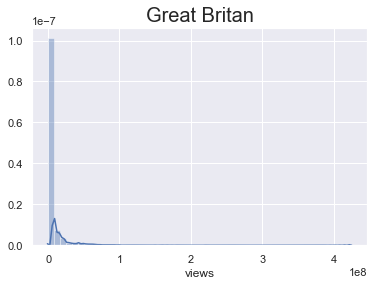

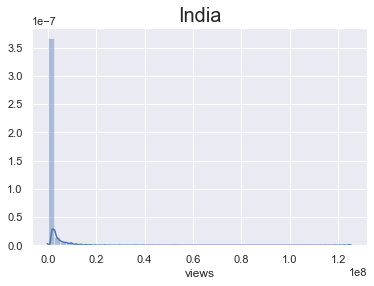

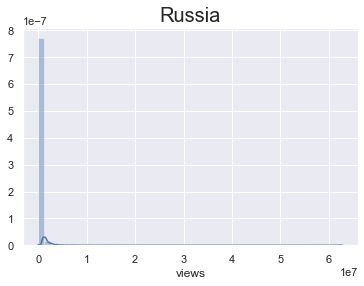

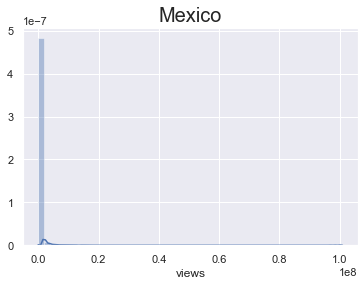

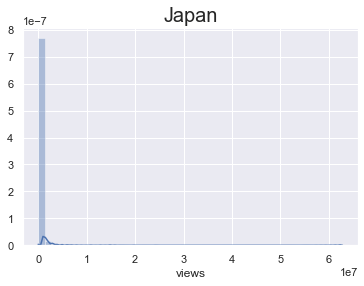

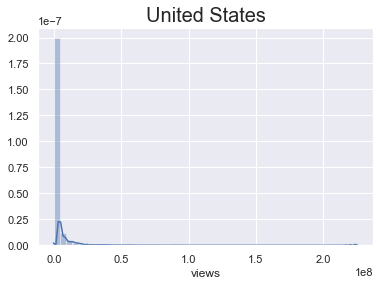

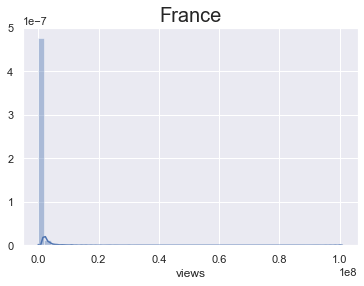

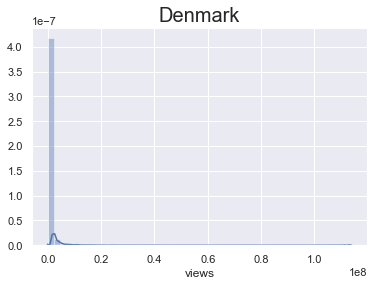

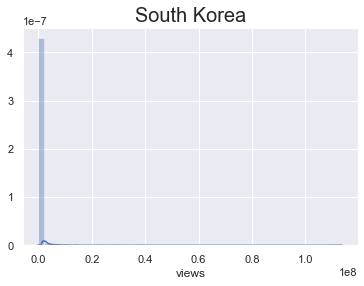

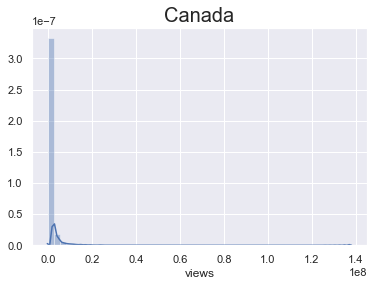

In [16]:
def PDF_views(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['views'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_views(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of likes

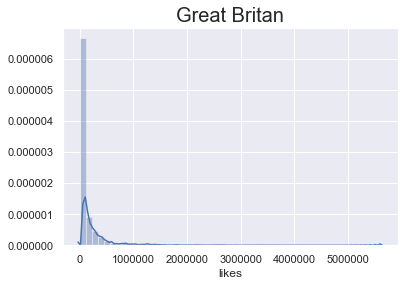

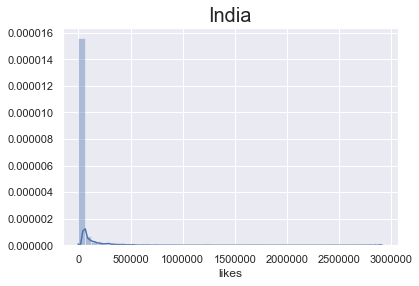

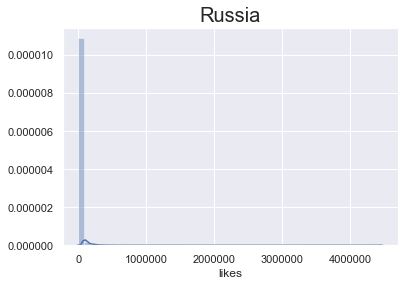

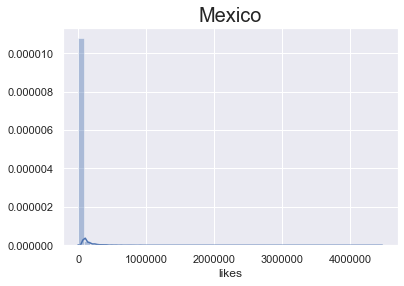

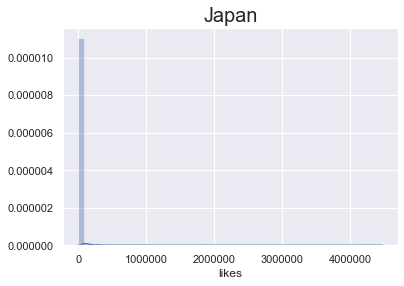

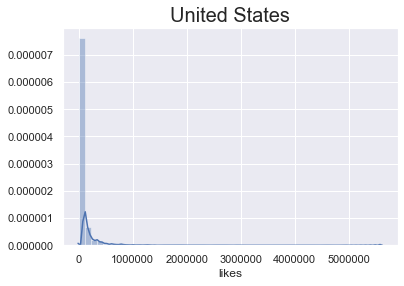

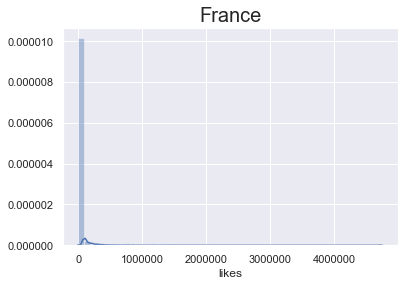

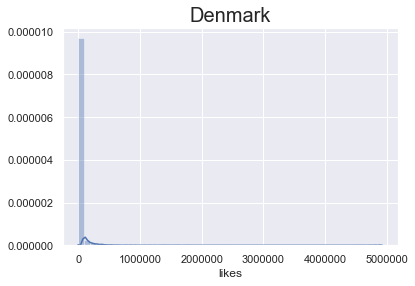

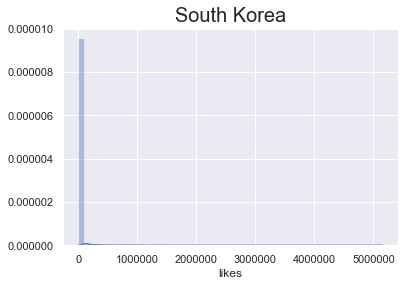

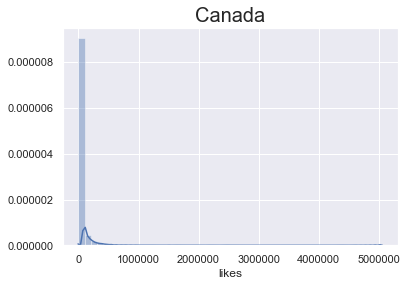

In [17]:
def PDF_likes(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['likes'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_likes(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of dislikes

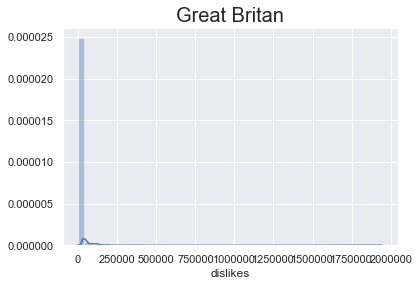

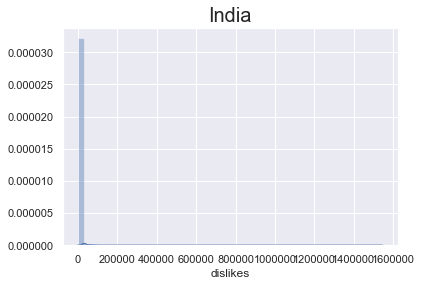

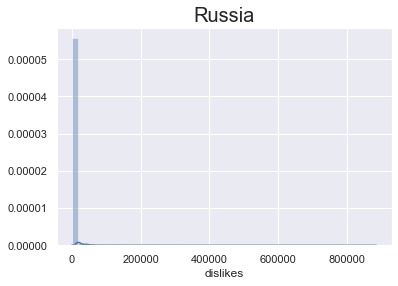

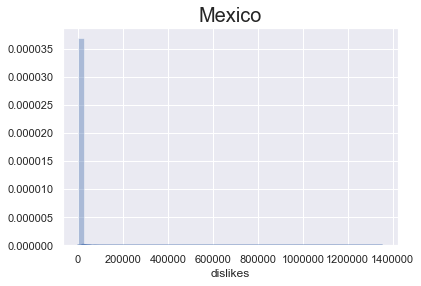

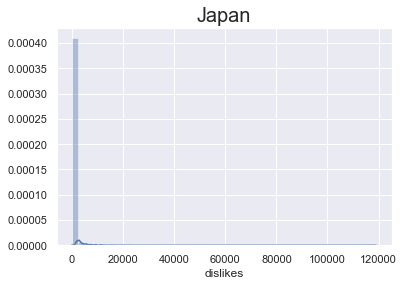

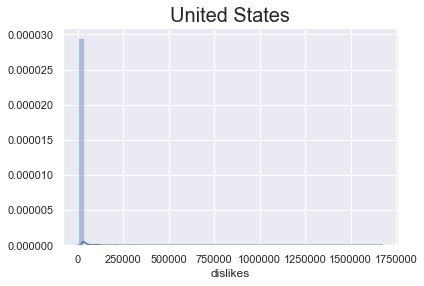

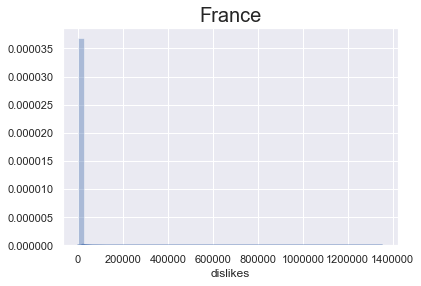

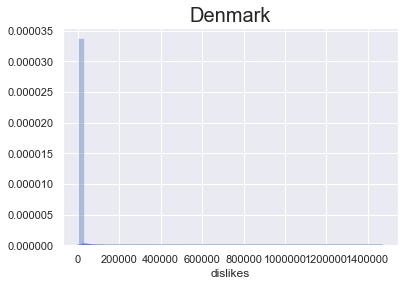

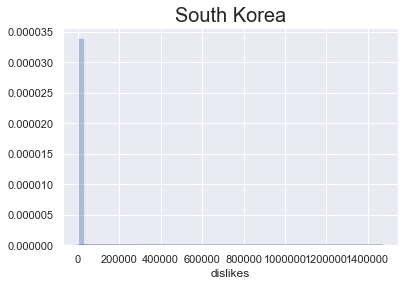

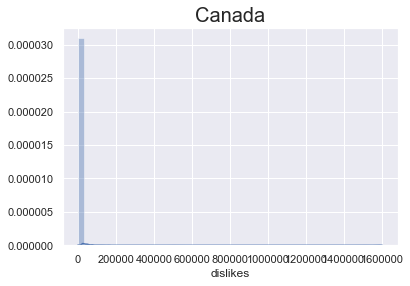

In [18]:
def PDF_dislikes(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['dislikes'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_dislikes(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of Comment Count

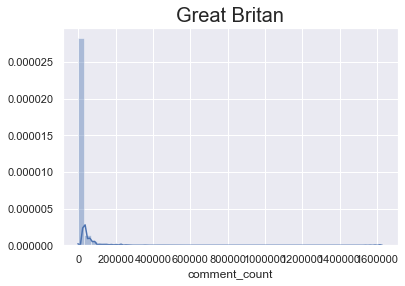

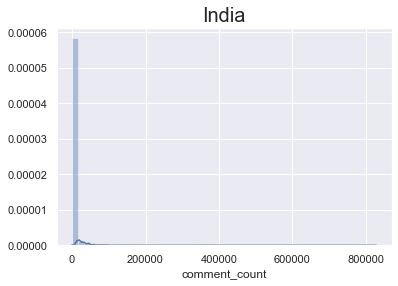

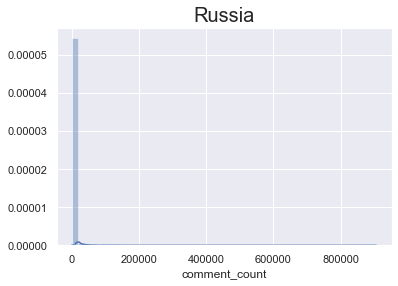

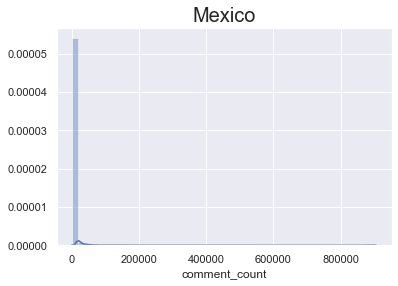

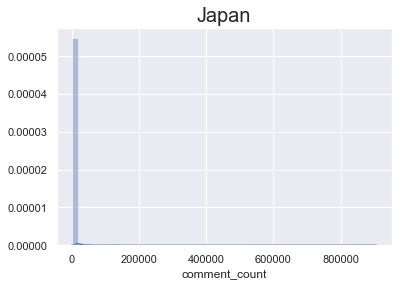

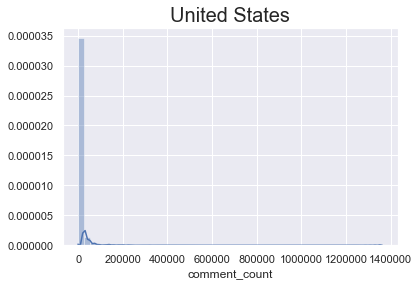

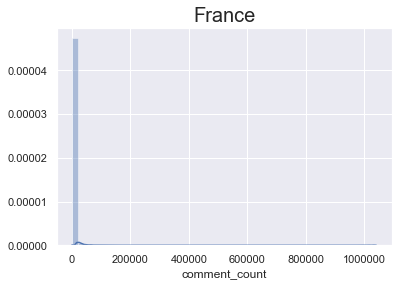

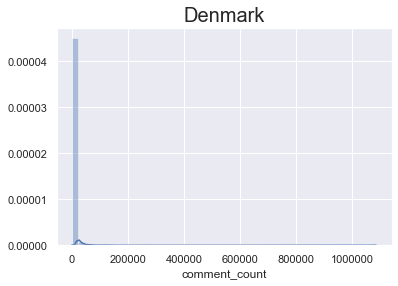

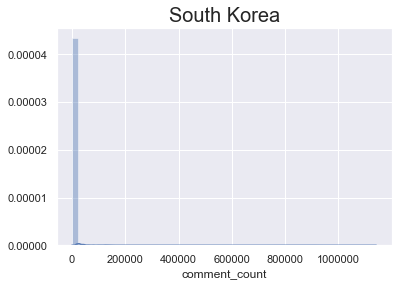

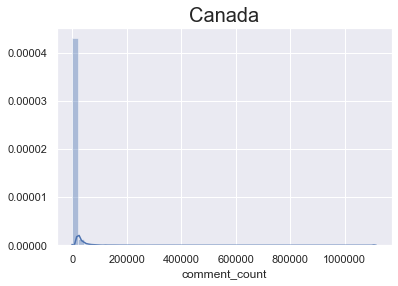

In [19]:
def PDF_comments(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['comment_count'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_comments(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of time to trend

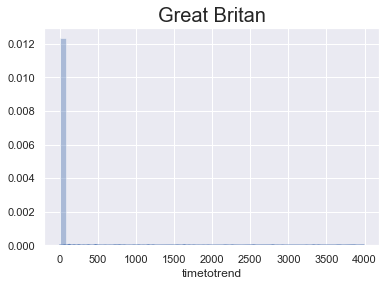

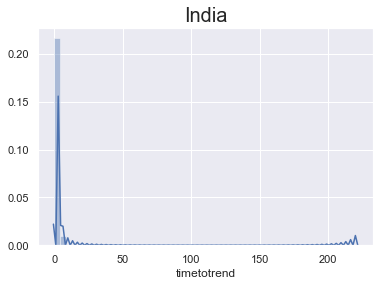

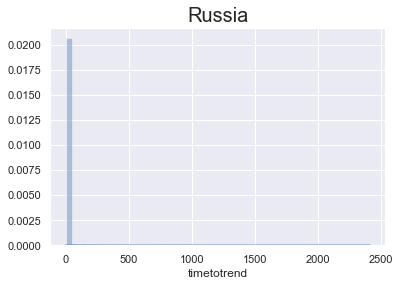

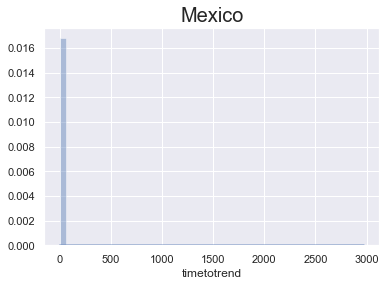

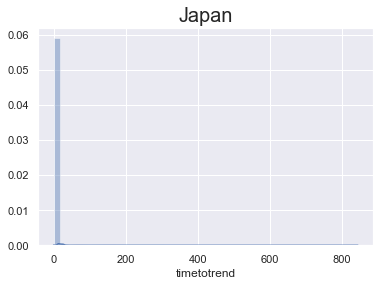

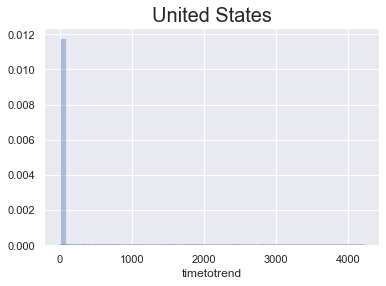

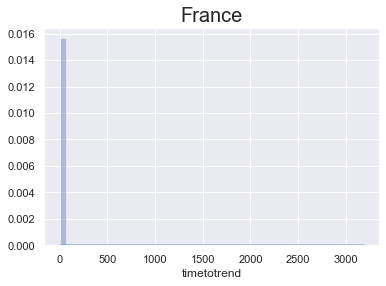

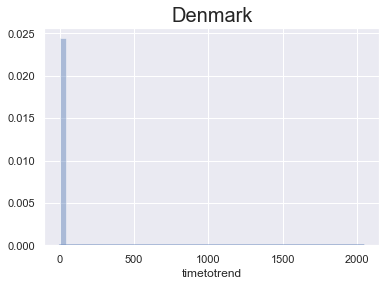

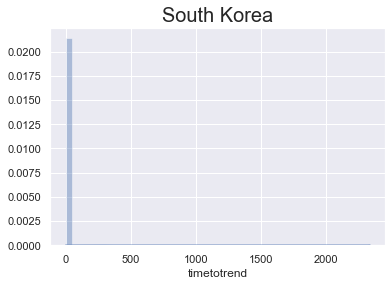

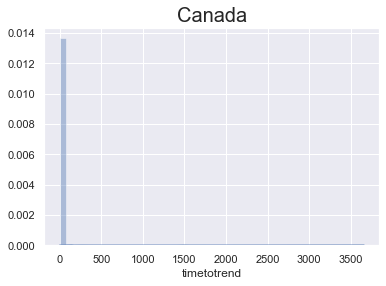

In [13]:
raw_data.timetotrend = raw_data.timetotrend.astype(int)
def PDF_trend(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['timetotrend'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_trend(select,i)

#### OBSERVATION
All countries have highly troublesome outliers.

# PDF of tag count

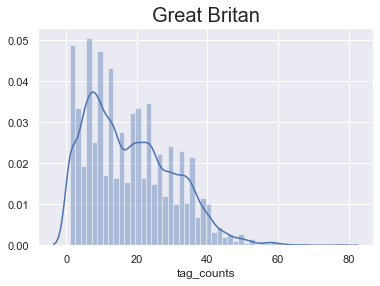

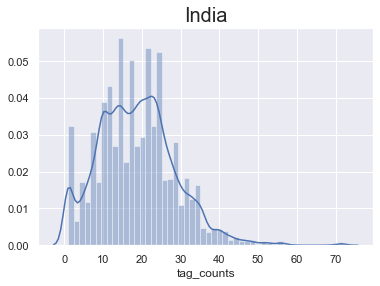

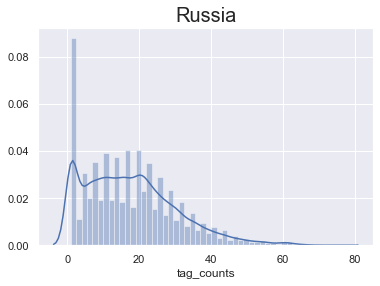

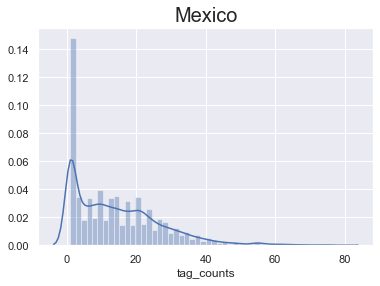

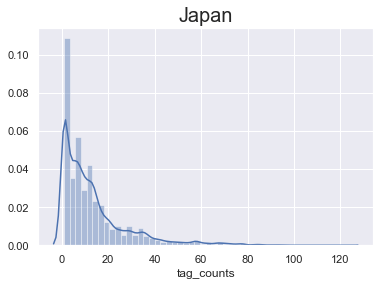

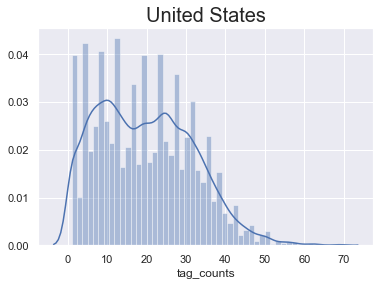

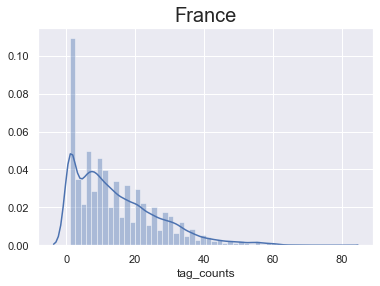

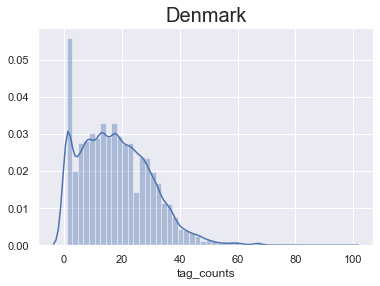

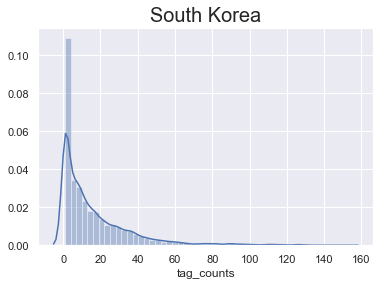

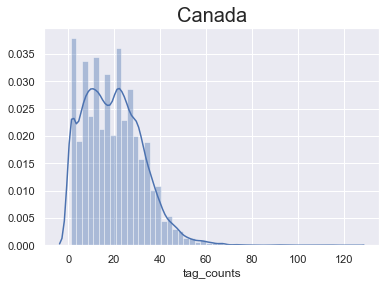

In [14]:
def PDF_tag(select,i):
    plt.title(i,fontsize=20)
    sns.distplot(select['tag_counts'])
    plt.show()
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    PDF_tag(select,i)

#### OBSERVATION
All countries don't have highly troublesome outliers.

## Dealing with Outliers

In [167]:
# Outliers are a great issue for OLS, thus we must deal with them in some way

## Views Outliers

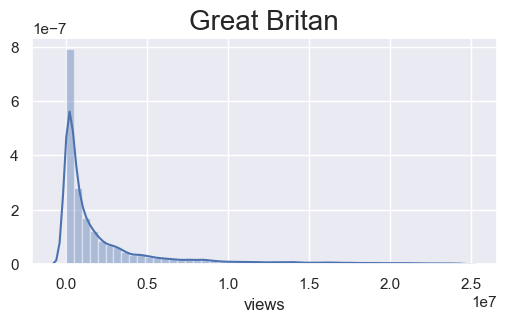

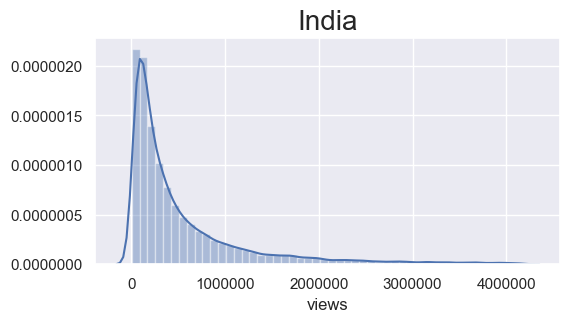

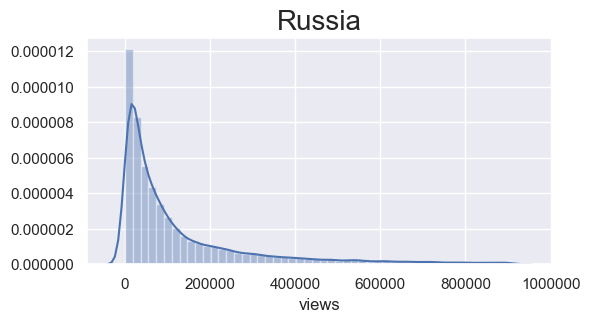

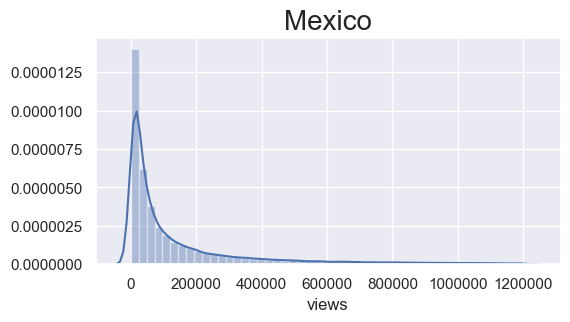

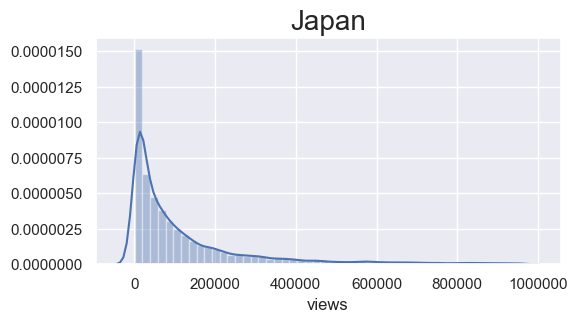

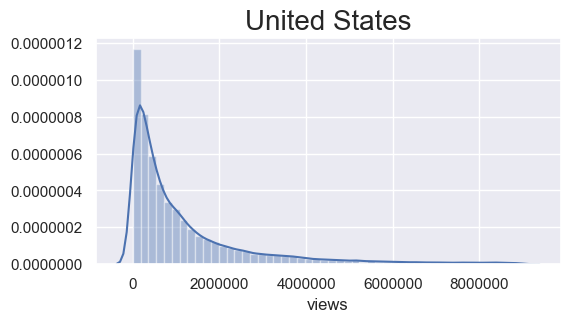

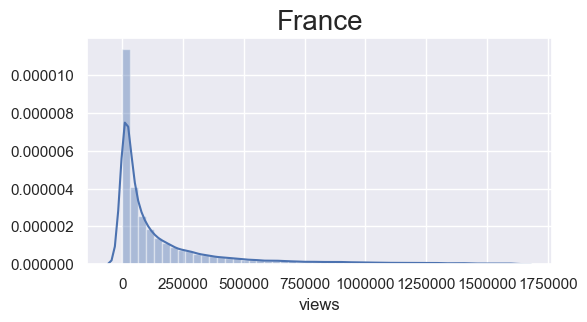

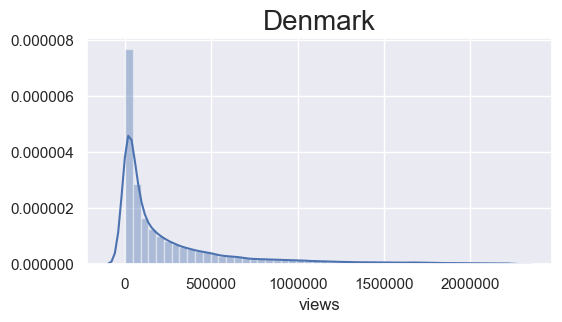

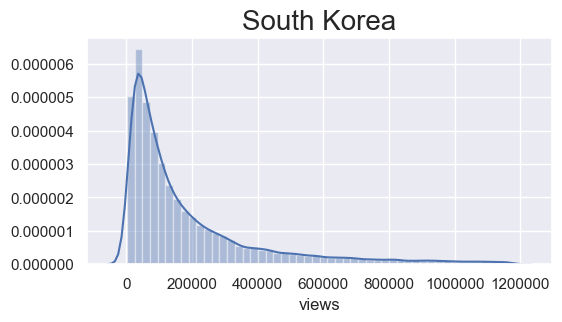

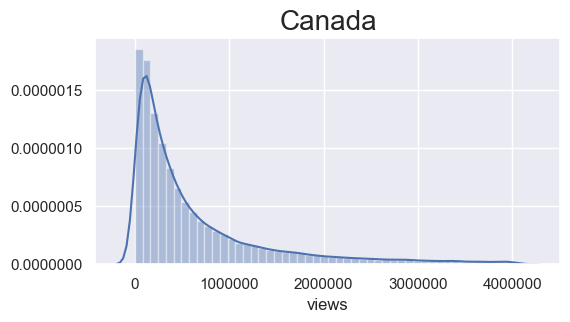

In [308]:
list_dataframe =[]

def outliers_views(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['views'].quantile(0.95)
    select_temp = select[select['views']<q]
    PDF_views(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = df.loc[df['region']==i] #Selects all rows of a particular country
    outliers_views(select,i)
    
data_1 = pd.concat(list_dataframe,ignore_index=True)

# Likes Outliers

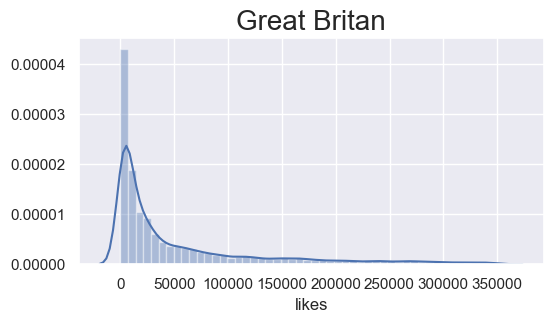

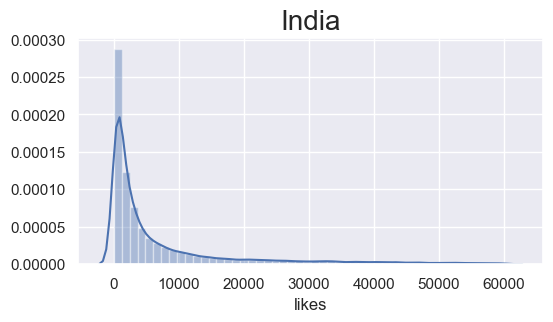

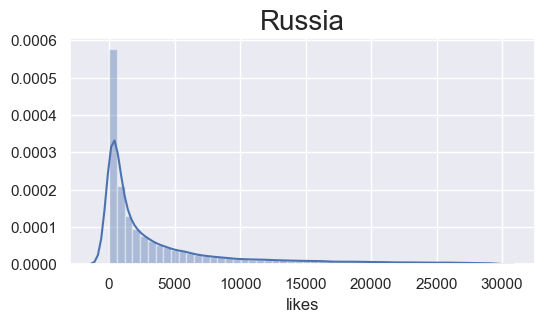

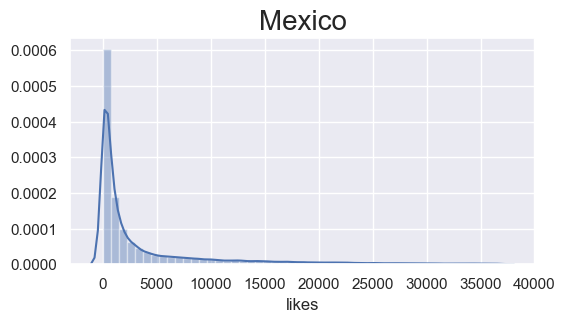

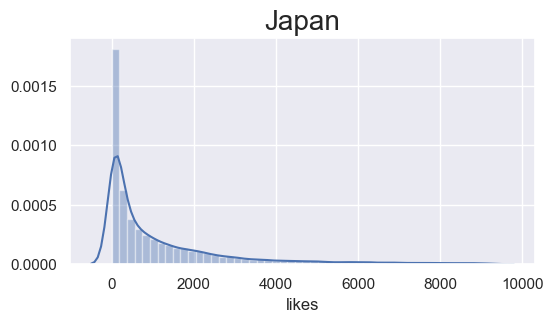

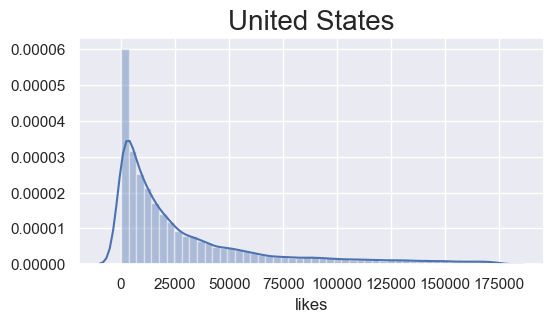

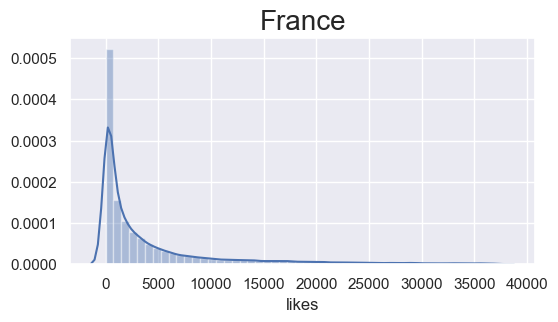

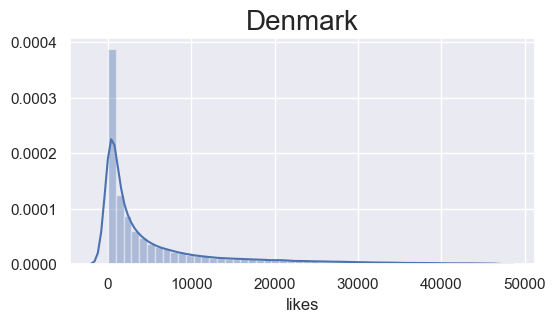

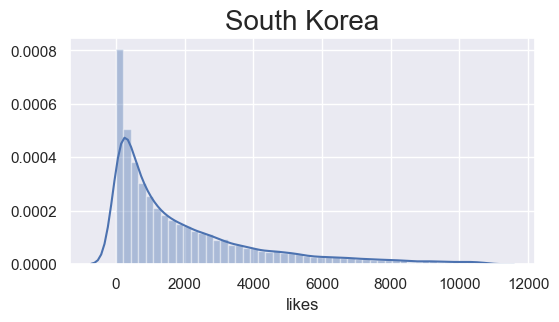

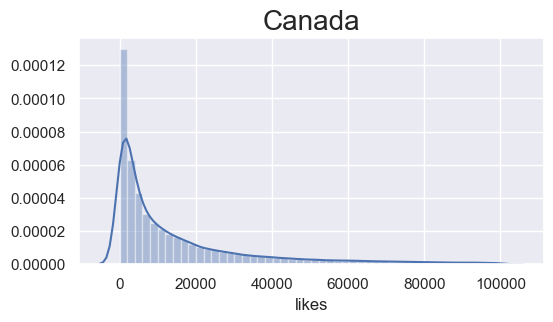

In [309]:
list_dataframe =[]

def outliers_likes(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['likes'].quantile(0.95)
    select_temp = select[select['likes']<q]
    PDF_likes(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_1.loc[data_1['region']==i] #Selects all rows of a particular country
    outliers_likes(select,i)
    
data_2 = pd.concat(list_dataframe,ignore_index=True)

## Dislikes Outliers

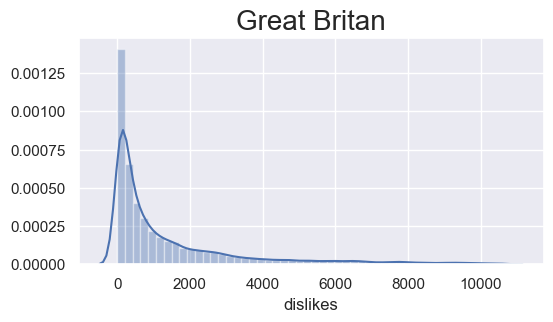

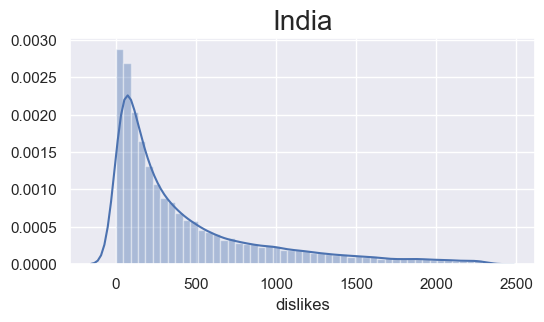

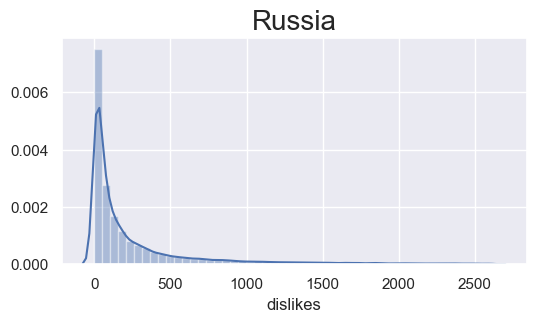

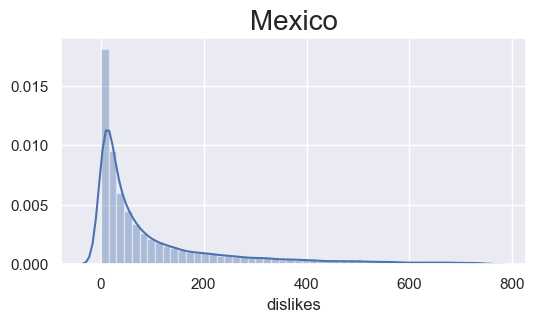

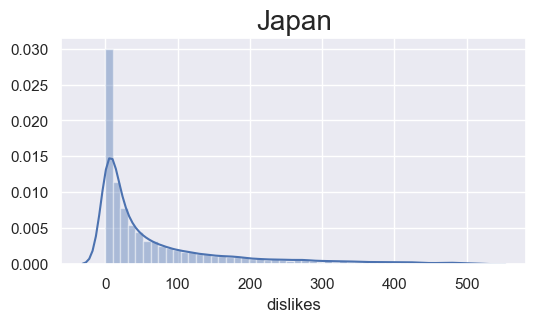

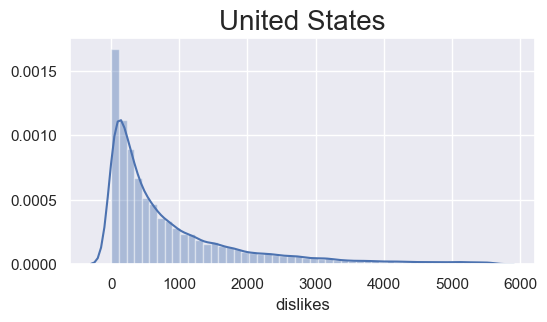

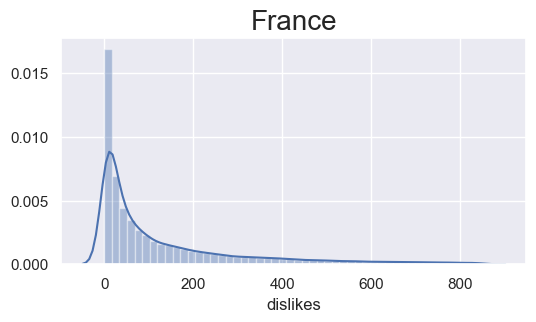

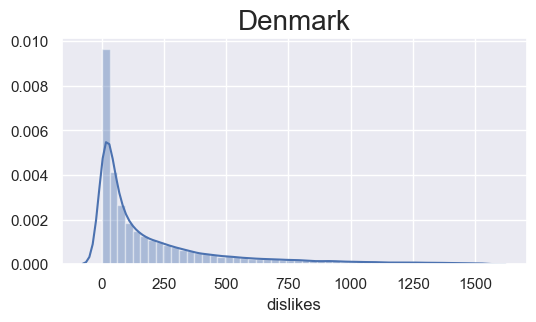

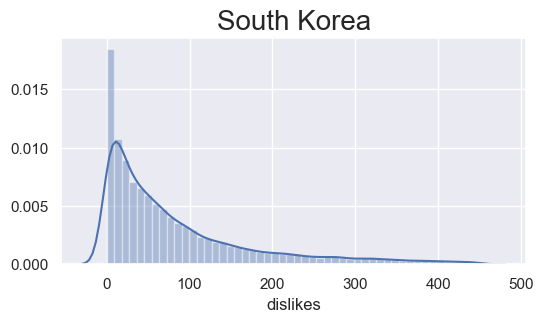

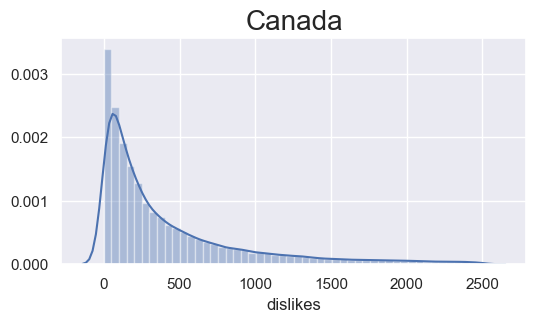

In [310]:
list_dataframe =[]

def outliers_dislikes(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['dislikes'].quantile(0.95) 
    select_temp = select[select['dislikes']<q]
    PDF_dislikes(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_2.loc[data_2['region']==i] #Selects all rows of a particular country
    outliers_dislikes(select,i)
    
data_3 = pd.concat(list_dataframe,ignore_index=True)

## Comment Count Outliers

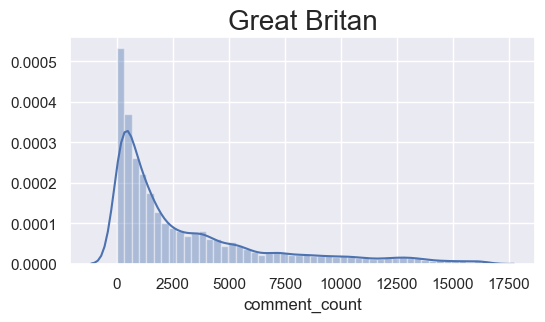

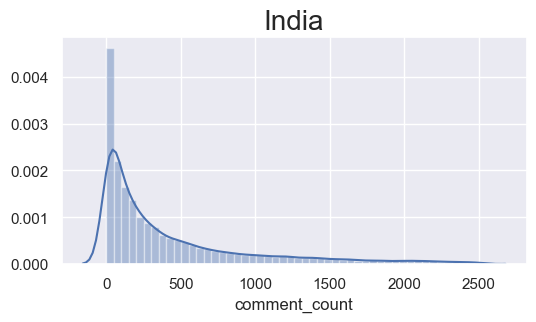

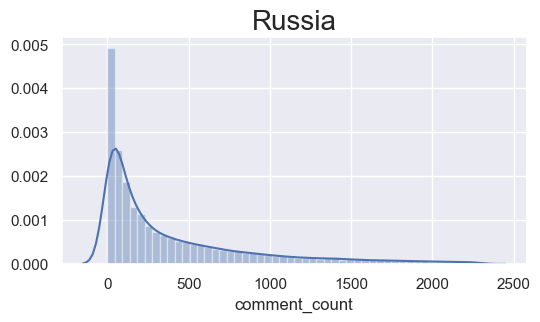

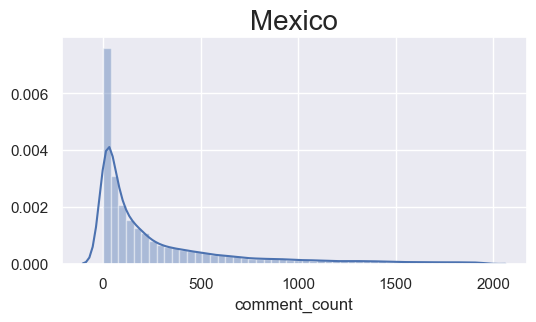

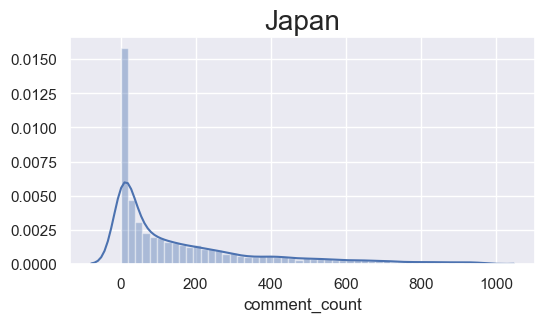

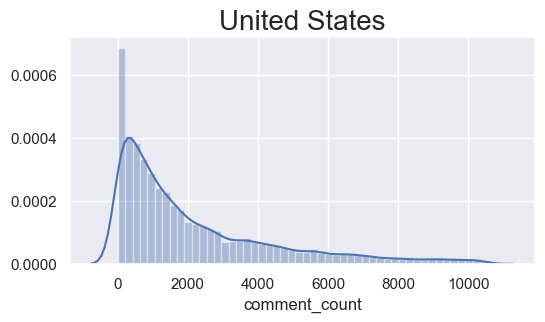

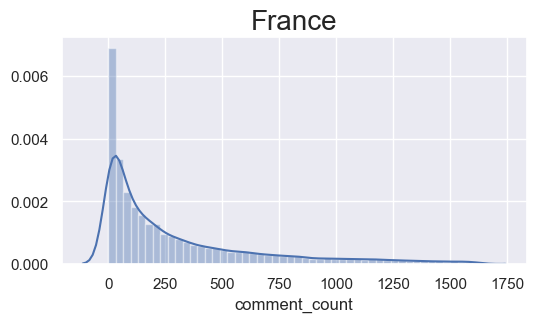

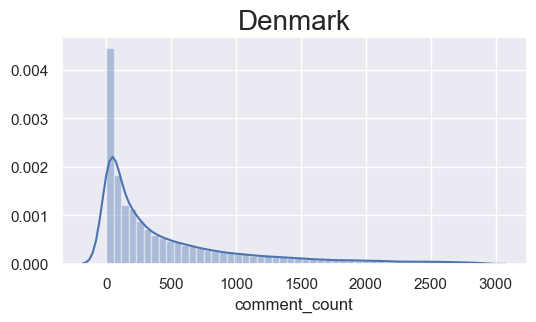

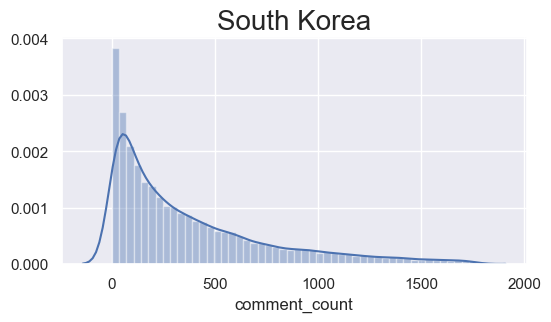

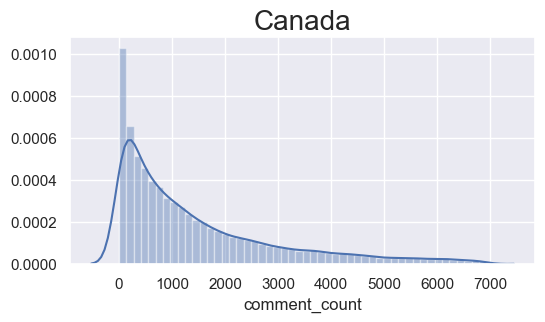

In [311]:
list_dataframe =[]

def outliers_comments(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['comment_count'].quantile(0.95)
    select_temp = select[select['comment_count']<q]
    PDF_comments(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_3.loc[data_3['region']==i] #Selects all rows of a particular country
    outliers_comments(select,i)
    
data_4 = pd.concat(list_dataframe,ignore_index=True)

# TimetoTrend Outliers

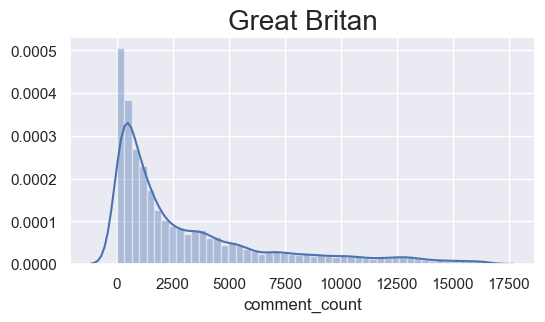

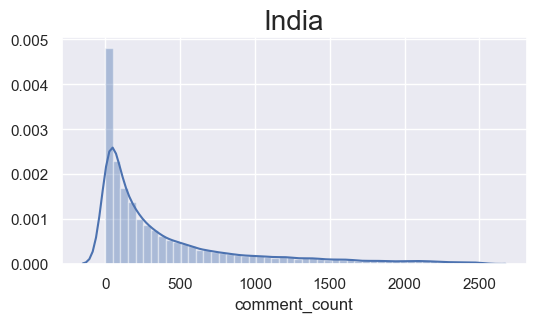

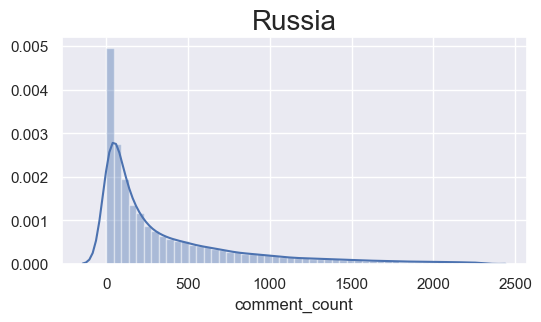

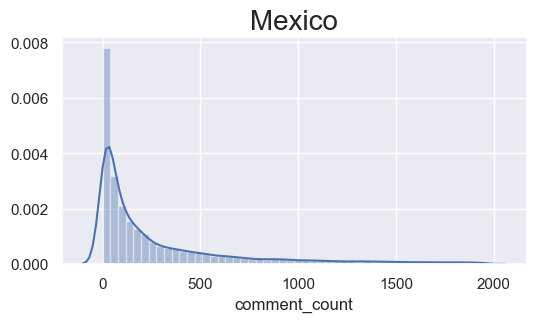

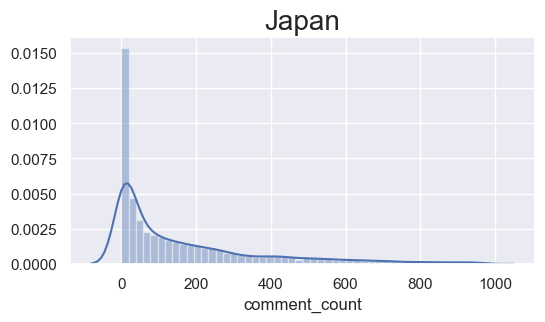

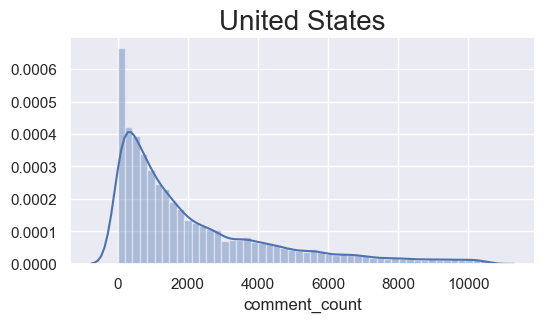

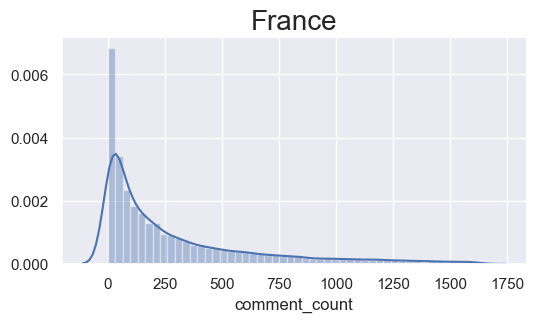

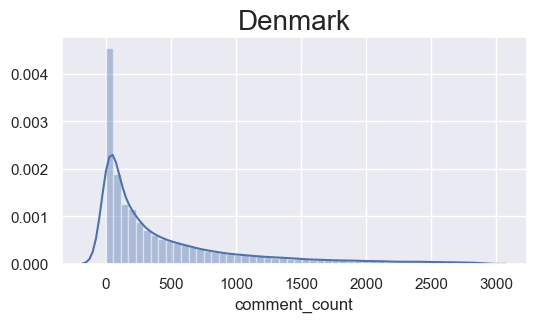

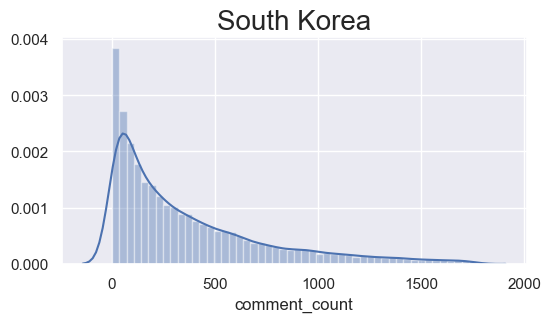

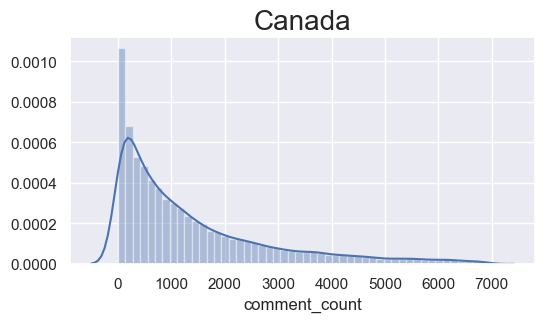

In [312]:
list_dataframe =[]

def outliers_trend(select,i):
    select_temp =pd.DataFrame(columns=df.columns.values)
    q= select['timetotrend'].quantile(0.95)
    select_temp = select[select['timetotrend']<q]
    PDF_comments(select_temp,i)
    list_dataframe.append(select_temp)
    
for i in countries:
    select = data_4.loc[data_4['region']==i] #Selects all rows of a particular country
    outliers_trend(select,i)
    
data_5 = pd.concat(list_dataframe,ignore_index=True)

In [72]:
data_5.describe(include='all')

title  category_id       views     likes  \
count                            279514    279514.00   279514.00 279514.00   
unique                           166121          nan         nan       nan   
top     Florence + The Machine - Hunger          nan         nan       nan   
freq                                 48          nan         nan       nan   
mean                                NaN        20.57   388175.15   9960.81   
std                                 NaN         6.98   991322.52  24849.61   
min                                 NaN         1.00      117.00      0.00   
25%                                 NaN        20.00    32439.50    462.00   
50%                                 NaN        24.00   107573.50   2030.00   
75%                                 NaN        24.00   335207.25   7864.75   
max                                 NaN        44.00 24475485.00 353017.00   

        dislikes  comment_count  comments_disabled  ratings_disabled  \
count  279514.00      279514.00          279514.00         279514.00   
unique       nan            nan                nan               nan   
top          nan            nan                nan               nan   
freq         nan            nan                nan               nan   
mean      365.88         956.62               0.02              0.02   
std       791.52        1821.10               0.16              0.15   
min         0.00           0.00               0.00              0.00   
25%        28.00          74.00               0.00              0.00   
50%       104.00         307.00               0.00              0.00   
75%       341.00         966.00               0.00              0.00   
max     10661.00       16578.00               1.00              1.00   

        video_error_or_removed         region  timetotrend      hour  \
count                279514.00         279514    279514.00 279514.00   
unique                     nan             10          nan       nan   
top                        nan  United States          nan       nan   
freq                       nan          31610          nan       nan   
mean                      0.00            NaN         2.68     12.60   
std                       0.02            NaN         4.05      6.28   
min                       0.00            NaN         0.00      0.00   
25%                       0.00            NaN         1.00      8.00   
50%                       0.00            NaN         1.00     14.00   
75%                       0.00            NaN         2.00     17.00   
max                       1.00            NaN        31.00     23.00   

        tag_counts  
count    279514.00  
unique         nan  
top            nan  
freq           nan  
mean         17.03  
std          13.28  
min           1.00  
25%           7.00  
50%          15.00  
75%          25.00  
max         152.00

# Checking the Linearity

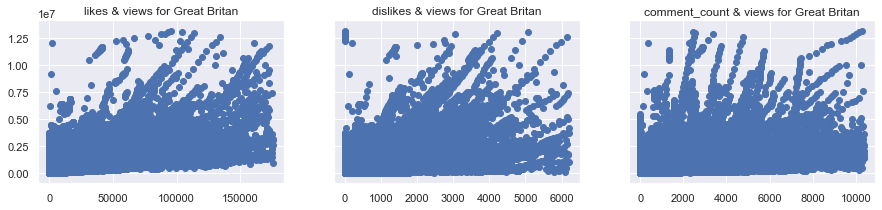

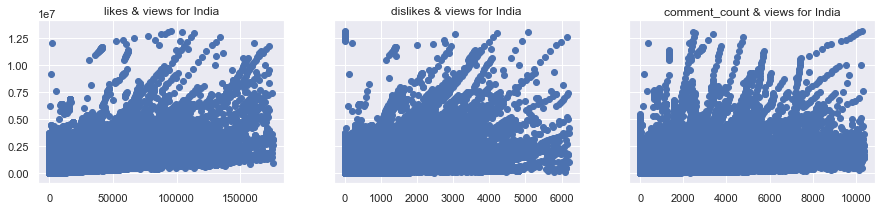

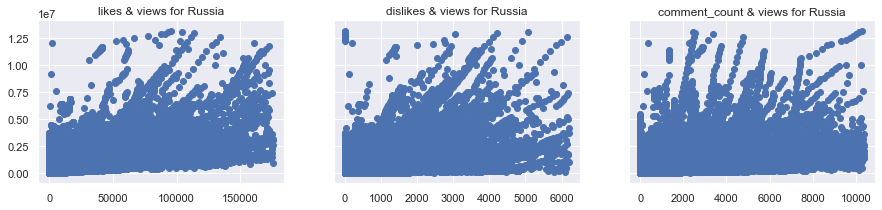

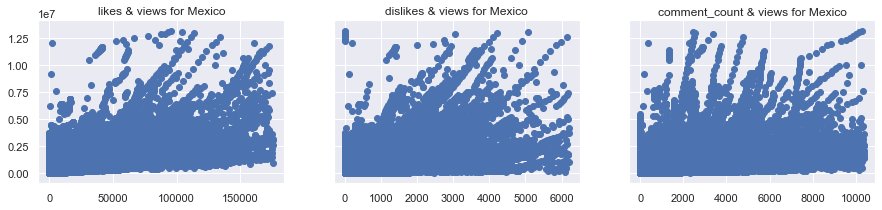

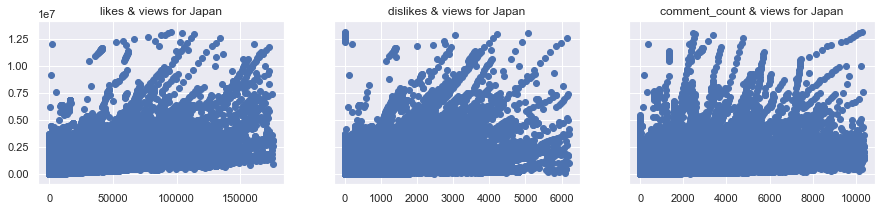

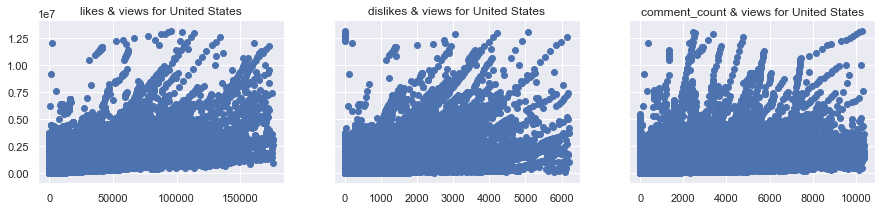

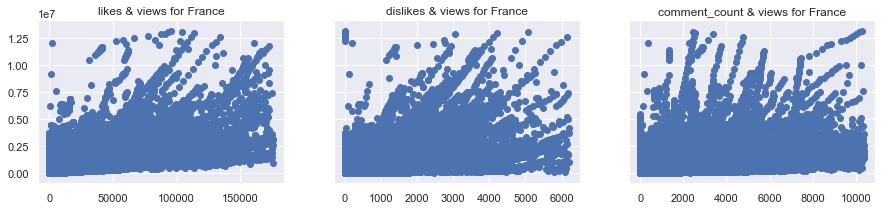

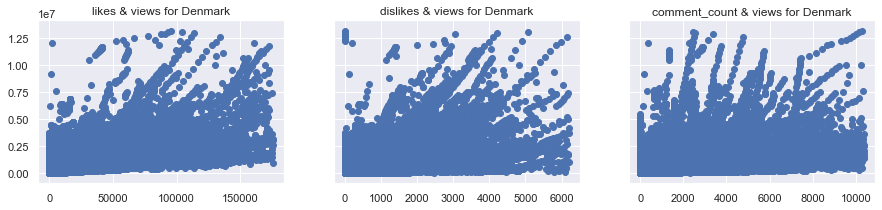

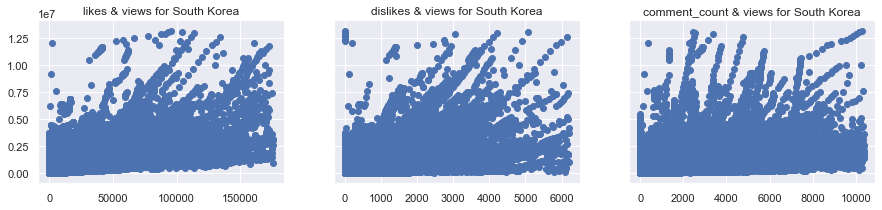

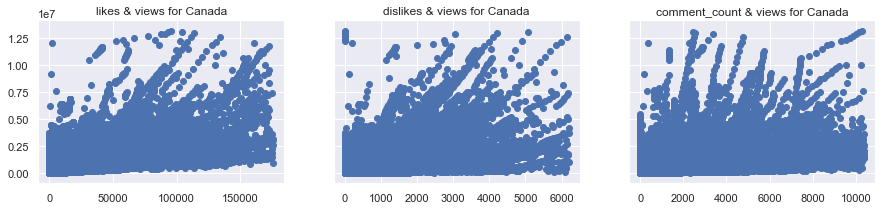

In [39]:
def plots(select,i):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'views' as y
    ax1.scatter(data_5['likes'],data_5['views'])
    ax1.set_title('likes & views for ' + i)
    ax2.scatter(data_5['dislikes'],data_5['views'])
    ax2.set_title('dislikes & views for ' + i)
    ax3.scatter(data_5['comment_count'],data_5['views'])
    ax3.set_title('comment_count & views for ' + i)
    plt.show()
    
for i in countries:
    select = data_5.loc[data_5['region']==i] #Selects all rows of a particular country
    plots(select,i)


#### OBSERVATION :
There is no apparent linear relationship between the X & Y.

## Fixing the above problem

In [313]:
data_5 = data_5[(data_5[['views','likes','dislikes','comment_count']] != 0).all(axis=1)]

In [105]:
data_5.describe()

category_id       views     likes  dislikes  comment_count  \
count    264907.00   264907.00 264907.00 264907.00      264907.00   
mean         20.53   397254.01  10394.70    378.01        1003.46   
std           6.99  1000885.71  25334.51    799.23        1855.87   
min           1.00      117.00      1.00      1.00           1.00   
25%          20.00    35262.50    564.00     33.00          92.00   
50%          24.00   113047.00   2252.00    114.00         341.00   
75%          24.00   347040.00   8427.00    356.00        1026.00   
max          43.00 24475485.00 353017.00  10661.00       16578.00   

       comments_disabled  ratings_disabled  video_error_or_removed  \
count          264907.00         264907.00               264907.00   
mean                0.00              0.00                    0.00   
std                 0.00              0.00                    0.02   
min                 0.00              0.00                    0.00   
25%                 0.00              0.00                    0.00   
50%                 0.00              0.00                    0.00   
75%                 0.00              0.00                    0.00   
max                 0.00              0.00                    1.00   

       timetotrend      hour  tag_counts  
count    264907.00 264907.00   264907.00  
mean          2.73     12.65       17.25  
std           4.10      6.25       13.21  
min           0.00      0.00        1.00  
25%           1.00      8.00        7.00  
50%           1.00     14.00       15.00  
75%           2.00     17.00       25.00  
max          31.00     23.00      152.00

In [314]:
# Let's transform all attributes with a log transformation
log_views = np.log(data_5['views'])
log_likes = np.log(data_5['likes'])
log_dislikes = np.log(data_5['dislikes'])
log_comments = np.log(data_5['comment_count'])

# Then we add it to our data frame
data_5['log_views'] = log_views
data_5['log_likes'] = log_likes
data_5['log_dislikes'] = log_dislikes
data_5['log_comments'] = log_comments

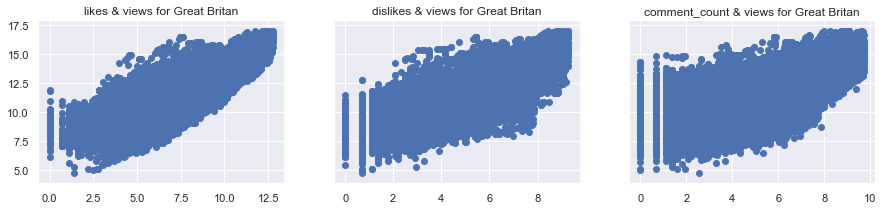

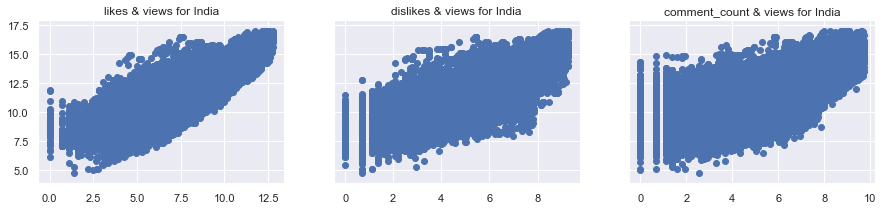

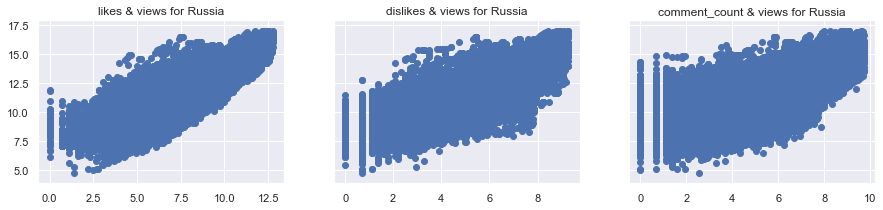

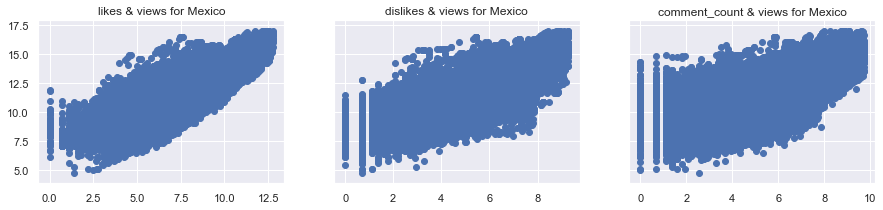

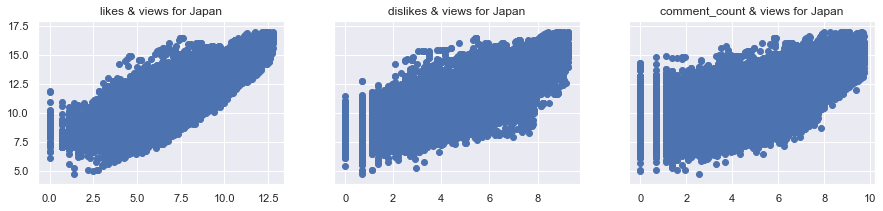

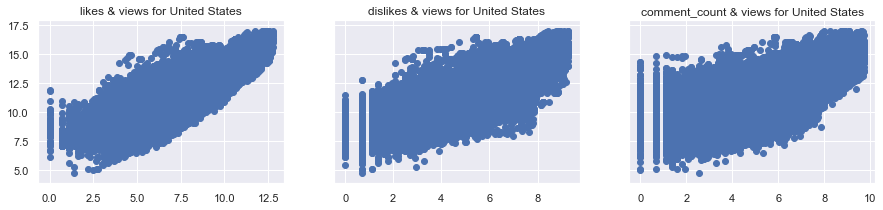

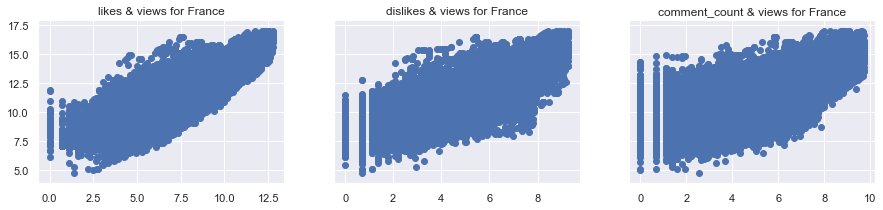

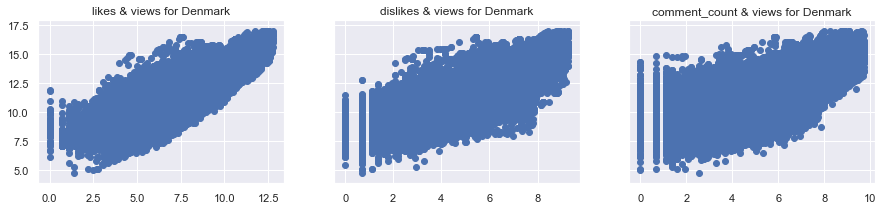

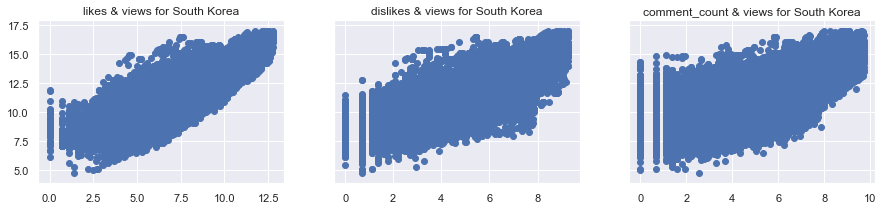

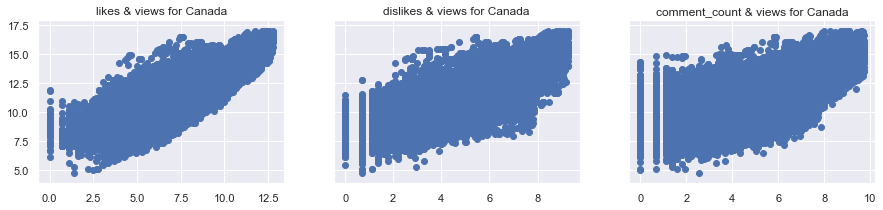

In [75]:
def log_plots(select,i):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'views' as y
    ax1.scatter(data_5['log_likes'],data_5['log_views'])
    ax1.set_title('likes & views for ' + i)
    ax2.scatter(data_5['log_dislikes'],data_5['log_views'])
    ax2.set_title('dislikes & views for ' + i)
    ax3.scatter(data_5['log_comments'],data_5['log_views'])
    ax3.set_title('comment_count & views for ' + i)
    plt.show()
    
for i in countries:
    select = data_5.loc[data_5['region']==i] #Selects all rows of a particular country
    log_plots(select,i)

#### OBSERVATION : 
The scatter plots now show a good linear relationship.

In [315]:
# Since we will be using the log variables, we can drop the old ones
data_cleaned = data_5.drop(['views' , 'likes' , 'dislikes' , 'comment_count'],axis=1)

In [108]:
data_cleaned

title  category_id  \
0                Waymo's fully self-driving cars are here           28   
1       This Hidden 300 Foot Stretch Of The Berlin Wal...           25   
2                                              Reading #3           22   
3           Hank Azaria: 'The Right Thing To Do' With Apu           22   
4       Sammi Maria, Blogger & Vlogger | THE SUNDAY SO...           22   
5       Bright: The Apotheosis of Lazy Worldbuilding |...           24   
6       Danielle Bregoli Blasts Chanel West Coast for ...           24   
7       Show Dogs | Official Trailer | In Theaters May 18           24   
8         SZA - Garden (Say It Like Dat) (Official Video)           10   
9       HOSTILES ON THE HILL — A Bad Lip Reading of Th...           23   
10      SZA - Doves In The Wind (Official Video) ft. K...           10   
11      Anitta - Vai Malandra (Alesso & KO:YU Remix) w...           10   
12                      DJ Snake - Magenta Riddim (Audio)           10   
13                              Pale Waves - My Obsession           10   
14      Snoop Dogg Weighs In On Kanye's Controversial ...           24   
15      BHAD BHABIE feat. Lil Yachty - Gucci Flip Flop...           22   
16       Meghan Markle Engaged To Prince Harry | The View           24   
17      THE OUTLAW JOHNNY BLACK Trailer #1 NEW (2018) ...           24   
18      Brad Pitt Returns as the Weatherman - The Jim ...           23   
19      Tommy Wiseau’s Joker Audition Tape (Nerdist Pr...           24   
20                     Flo Rida - Dancer (Official Video)           10   
21      [King of masked singer] 복면가왕 - 'unicorn' speci...           24   
22       HOW TO WEAR A SUIT | STYLE IDEAS AND ACCESSORIES           26   
23                   HENRY 헨리 'Monster' MV (English Ver.)           10   
24                    Burn The Priest - Inherit the Earth           10   
25      Trixie Mattel - Break Your Heart (Official Mus...           10   
26                  Match the Dog to Their Owner - Lineup           24   
27      What If Your Airplane Door Burst Open Mid-Flight?           28   
28                 Meek Mill - Fall Thru (Official Video)           10   
29               Hayley Kiyoko - Curious [Official Video]           10   
...                                                   ...          ...   
279484        Senselet Drama S02 EP32 ሰንሰለት ምዕራፍ 2 ክፍል 32            1   
279485     Seth Rogen and His Wife Lauren Play 'Pie Face'           24   
279486  Aisi Hai Tanhai Episode 7 & 8 - 29th Nov 2017 ...           24   
279487     What To Buy HER: Christmas 2017 | FleurDeForce           26   
279488  NANINIWALA BA KAYO SA MILAGRO? ETO ANG ISANG M...           25   
279489  Shannon Sharpe reacts to LeBron revealing his ...           17   
279490                    LA NOIRE (Honest Game Trailers)           20   
279491  مسلسل الطوفان - الحلقة الحادية والثلاثون - The...           24   
279492                         15 Ways to Destroy A Lamp!           24   
279493      Zack Knight - Galtiyan (Official Music Video)           10   
279494     #GiveAToast with Connor McDavid on November 20           10   
279495                 Offensive Interview Prank at UCLA!           23   
279496  Should Your Bestie's Enemy Become Your Enemy? ...           24   
279497                   WONDER WOMAN- ralphthemoviemaker            1   
279498  Hawaii Eruption: Scientists Describe New Lava ...           25   
279499  High Alert: Hawaii’s Kilauea Volcano Is Now Sp...           28   
279500  Supergirl 3x13 Promo Both Sides Now (HD) Seaso...           24   
279501  《天籁之战2》第13期20180113：天籁之战总决赛 华晨宇摇滚改编《渺小》飙rap 费玉...           24   
279502  Wizards of Waverly Place: The Movie - Disneyce...           24   
279503                 JRE MMA Show #18 with Pat Miletich           22   
279504              Know It or BLOW IT?? Ft. Gina Darling           24   
279505      The Moiré Effect Lights That Guide Ships Home           27   
279506  All The HEATED Moments During Kardashian vs. W..

# LINEAR REGRESSION MODEL (GLOBAL)
(Without taking region as in input)

In [316]:
data_cleaned = data_cleaned.drop('title' , axis=1)

### Declare the inputs & target

In [212]:
# The target(s) (dependent variable) is 'log_views'
targets = data_cleaned['log_views']

# The inputs are everything BUT the dependent variable & 'region', so we can simply drop it
inputs = data_cleaned.drop(['log_views' , 'region'],axis=1)

### Scale the data

In [213]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [214]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split everytime, random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the Regression

In [215]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
# Storing the outputs(the predictions) of the regression 
y_hat = reg.predict(x_train)

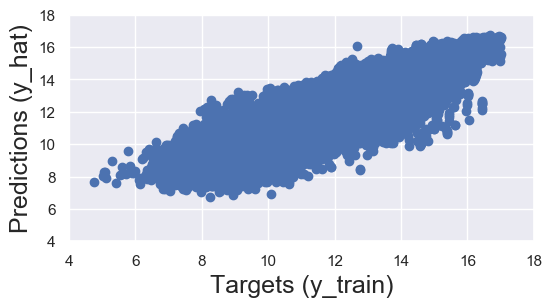

In [217]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

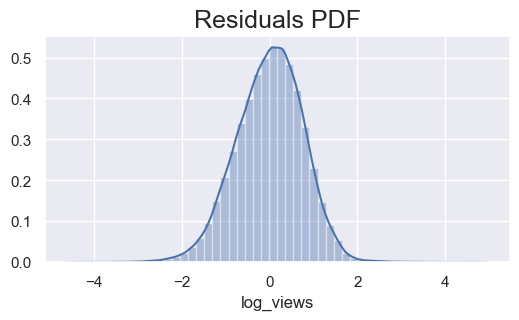

In [218]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

### Summary , Weights & Bias

In [219]:
x1=sm.add_constant(x_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.036e+05
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:07:40   Log-Likelihood:            -2.4128e+05
No. Observations:              211925   AIC:                         4.826e+05
Df Residuals:                  211916   BIC:                         4.827e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5969      0.002   7066.466      0.000      11.594      11.600
x1            -0.0528      0.002    -31.674      0.000      -0.056      -0.050
x2          2.799e-17   1.08e-18     25.957      0.000    2.59e-17    3.01e-17
x3         -2.874e-16   1.32e-18   -217.437      0.000    -2.9e-16   -2.85e-16
x4             0.0070      0.002      4.157      0.000       0.004       0.010
x5             0.1861      0.002    100.875      0.000       0.182       0.190
x6            -0.0809      0.002    -49.034      0.000      -0.084      -0.078
x7             0.0128      0.002      7.657      0.000       0.010       0.016
x8             0.5223      0.004    147.852      0.000       0.515       0.529
x9             1.0099      0.003    362.590      0.000       1.004       1.015
x10           -0.0620      0.003    -17.714      0.000      -0.069      -0.055
==============================================================================
Omnibus:                     2376.235   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.041
Skew:                          -0.179   Prob(JB):                         0.00
Kurtosis:                       3.463   Cond. No.                     8.81e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### OBSERVATION
R-squared(=0.796) measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model.

In [220]:
# Obtain the bias (intercept) of the regression
reg.intercept_

11.596901268680455

In [221]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-5.28070425e-02,  0.00000000e+00, -1.11022302e-16,  6.96087418e-03,
        1.86112128e-01, -8.08694186e-02,  1.27811587e-02,  5.22311628e-01,
        1.00988879e+00, -6.19888221e-02])

In [222]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_ # Weights - Regression Coefficients
reg_summary

Features  Weights
0             category_id    -0.05
1       comments_disabled     0.00
2        ratings_disabled    -0.00
3  video_error_or_removed     0.01
4             timetotrend     0.19
5                    hour    -0.08
6              tag_counts     0.01
7               log_likes     0.52
8            log_dislikes     1.01
9            log_comments    -0.06

#### OBSERVATION
1. Higher the absolute value of weight(regression coefficient) of a feature , higher is its influence on the target.
2. Dislikes has a high influence.

### TESTING

In [223]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

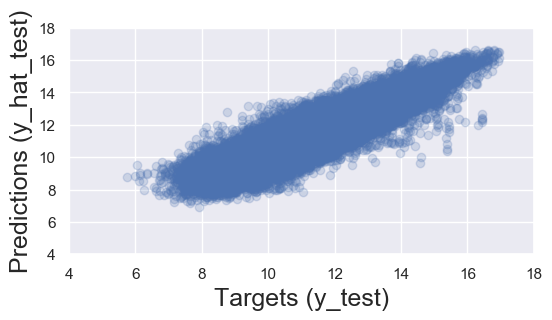

In [224]:
y_hat_test = reg.predict(x_test) #testing

# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

In [225]:
# Finally, let's manually check these predictions
# To obtain the actual views, we take the exponential of the log_views
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

#reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#we need the exponential of the test log views
df_pf['Target'] = np.exp(y_test)

# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

Prediction    Target   Residual  Difference%
0    77644.30 293447.00  215802.70        73.54
1   260251.80 130944.00 -129307.80        98.75
2  1193231.96 987475.00 -205756.96        20.84
3    18496.56   4338.00  -14158.56       326.38
4   143068.02 287989.00  144920.98        50.32

Text(0.5, 1.0, 'Residuals PDF')

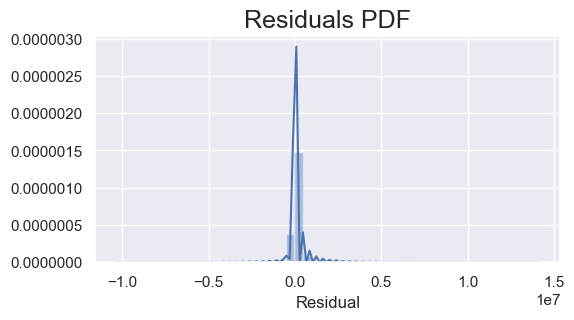

In [226]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(df_pf['Residual'])

# Include a title
plt.title("Residuals PDF", size=18)

In [227]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction      Target     Residual  Difference%
count    52982.00    52982.00     52982.00     52982.00
mean    334294.84   392822.45     58527.61        76.49
std     813133.56   996238.06    540549.50       124.40
min       1019.16      315.00 -10297755.60         0.00
25%      38196.92    34973.00    -31592.05        23.90
50%     108752.59   111775.50      1291.86        46.71
75%     293620.99   348503.00     72145.78        75.37
max   16987509.99 22963240.00  14112393.44      5652.28

#### OBSERVATION
1. 50% of the predicted values differ by 46.71% of the actual values
2. Minimum difference in actual & predicted is 0%.
3. Maximum difference in actual & predicted is 5652.28%. 

# LINEAR REGRESSION (Taking region also as an input)

## Create dummy variables`

In [228]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies to prevent multicollinearity
data_with_region = pd.get_dummies(data_cleaned, drop_first=True)
data_with_region.head()

category_id  comments_disabled  ratings_disabled  video_error_or_removed  \
0           28                  0                 0                       0   
1           25                  0                 0                       0   
2           22                  0                 0                       0   
3           22                  0                 0                       0   
4           22                  0                 0                       0   

   timetotrend  hour  tag_counts  log_views  log_likes  log_dislikes  \
0            7    16          14      13.41       8.78          6.57   
1            7    17          44      10.87       6.91          3.93   
2           12    20           6      12.98       8.52          5.20   
3            3     7          27      13.48       8.60          7.86   
4            8    16          16      10.73       7.58          3.56   

   log_comments  region_Denmark  region_France  region_Great Britan  \
0          7.82               0              0                    1   
1          4.88               0              0                    1   
2          5.28               0              0                    1   
3          8.28               0              0                    1   
4          4.86               0              0                    1   

   region_India  region_Japan  region_Mexico  region_Russia  \
0             0             0              0              0   
1             0             0              0              0   
2             0             0              0              0   
3             0             0              0              0   
4             0             0              0              0   

   region_South Korea  region_United States  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

### Declare the inputs & target

In [229]:
# The target(s) (dependent variable) is 'log_views'
targets = data_with_region['log_views']

# The inputs are everything BUT the dependent variable & 'region', so we can simply drop it
inputs = data_with_region.drop(['log_views'],axis=1)

### Scale the data

In [230]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [231]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Regression

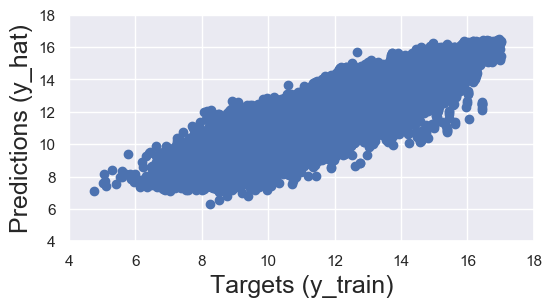

In [232]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

# Storing the outputs(the predictions) of the regression 
y_hat = reg.predict(x_train)


# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

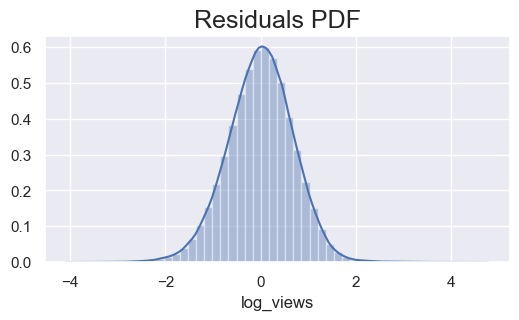

In [233]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

### Summary , Weights & Bias

In [234]:
x1=sm.add_constant(x_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 6.127e+04
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:07:54   Log-Likelihood:            -2.2153e+05
No. Observations:              211925   AIC:                         4.431e+05
Df Residuals:                  211907   BIC:                         4.433e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5972      0.001   7756.649      0.000      11.594      11.600
x1            -0.0785      0.002    -51.201      0.000      -0.081      -0.075
x2          1.545e-16   1.63e-18     94.747      0.000    1.51e-16    1.58e-16
x3          2.093e-16   8.22e-19    254.630      0.000    2.08e-16    2.11e-16
x4             0.0051      0.002      3.375      0.001       0.002       0.008
x5             0.1619      0.002     70.624      0.000       0.157       0.166
x6            -0.0435      0.002    -27.988      0.000      -0.047      -0.040
x7             0.0045      0.002      2.951      0.003       0.002       0.008
x8             0.5263      0.003    161.410      0.000       0.520       0.533
x9             0.9995      0.003    371.663      0.000       0.994       1.005
x10           -0.1193      0.003    -35.546      0.000      -0.126      -0.113
x11           -0.1630      0.002    -79.261      0.000      -0.167      -0.159
x12           -0.1943      0.002    -92.898      0.000      -0.198      -0.190
x13           -0.1087      0.003    -42.110      0.000      -0.114      -0.104
x14           -0.0200      0.002     -9.549      0.000      -0.024      -0.016
x15           -0.0714      0.002    -39.116      0.000      -0.075      -0.068
x16           -0.1968      0.002    -94.291      0.000      -0.201      -0.193
x17           -0.3070      0.002   -150.570      0.000      -0.311      -0.303
x18            0.0240      0.002     11.908      0.000       0.020       0.028
x19           -0.0735      0.002    -33.761      0.000      -0.078      -0.069
==============================================================================
Omnibus:                     2615.083   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4379.408
Skew:                          -0.089   Prob(JB):                         0.00
Kurtosis:                       3.681   Cond. No.                     6.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### OBSERVATION
Here, the R-squared value = 83.1% . 
Hence, addition of the region variable in the inputs improves the model.

In [235]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0              category_id    -0.08
1        comments_disabled     0.00
2         ratings_disabled     0.00
3   video_error_or_removed     0.01
4              timetotrend     0.16
5                     hour    -0.04
6               tag_counts     0.00
7                log_likes     0.53
8             log_dislikes     1.00
9             log_comments    -0.12
10          region_Denmark    -0.16
11           region_France    -0.19
12     region_Great Britan    -0.11
13            region_India    -0.02
14            region_Japan    -0.07
15           region_Mexico    -0.20
16           region_Russia    -0.31
17      region_South Korea     0.02
18    region_United States    -0.07

### OBSERVATION
Higher the absolute value of weights(regression coefficients) of a feature, higher is its influence on the Target value(views).

### TESTING

In [236]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

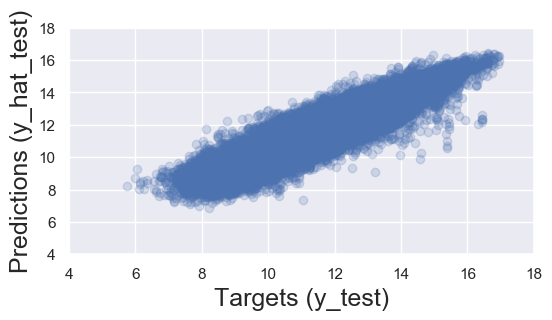

In [237]:
y_hat_test = reg.predict(x_test) #testing

# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

In [238]:
# Finally, let's manually check these predictions
# To obtain the actual views, we take the exponential of the log_views
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

#reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#we need the exponential of the test log views
df_pf['Target'] = np.exp(y_test)

# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

Prediction    Target   Residual  Difference%
0   115225.16 293447.00  178221.84        60.73
1   257436.92 130944.00 -126492.92        96.60
2  1260476.09 987475.00 -273001.09        27.65
3    15337.70   4338.00  -10999.70       253.57
4   116573.71 287989.00  171415.29        59.52

Text(0.5, 1.0, 'Residual PDF')

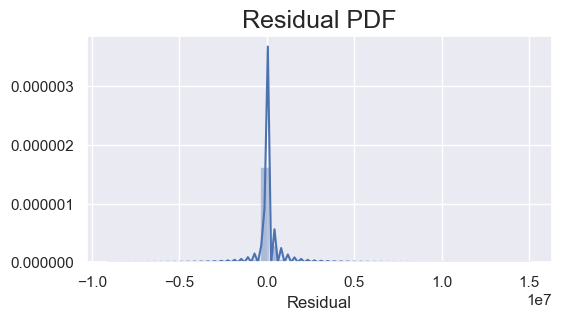

In [239]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(df_pf['Residual'])

# Include a title
plt.title("Residual PDF", size=18)

In [240]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction      Target    Residual  Difference%
count    52982.00    52982.00    52982.00     52982.00
mean    329203.76   392822.45    63618.69        65.44
std     711770.48   996238.06   549205.10        94.94
min        967.69      315.00 -9058765.34         0.00
25%      36932.55    34973.00   -30355.43        20.90
50%     111621.04   111775.50      259.45        42.24
75%     307365.91   348503.00    57990.64        69.34
max   13650299.41 22963240.00 15065112.52      3661.10

#### OBSERVATION
1. 50% of the predicted values differ by 42.24% of the actual values
2. Minimum difference in actual & predicted is 0%.
3. Maximum difference in actual & predicted is 3661.10%. 

Hence, further shown , that addition of region in the inputs improves the model's prediction power.

# Comparison of Regression Coefficients of Country-Wise Linear Regression

In [318]:
data_cleaned = data_cleaned.drop(['ratings_disabled' , 'comments_disabled' , 'tag_counts' , 'video_error_or_removed'],axis=1)

In [322]:
intercept=[]
coeff_likes=[]
coeff_dislikes=[]
coeff_categoryid=[]
coeff_timetotrend=[]
coeff_hour=[]
coeff_tagcounts=[]
coeff_comments=[]

def linear_regression(select):
    #Initializing data
    targets = select['log_views']
    inputs = select.drop(['log_views' , 'region'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(inputs_scaled,targets)
    
    intercept.append(reg.intercept_)
    coeff_categoryid.append(reg.coef_[0])
    coeff_timetotrend.append(reg.coef_[1])
    coeff_hour.append(reg.coef_[2])
    coeff_likes.append(reg.coef_[3])
    coeff_dislikes.append(reg.coef_[4])
    coeff_comments.append(reg.coef_[5])

In [323]:
for i in countries:
    select = data_cleaned.loc[data_cleaned['region']==i] #Selects all rows of a particular country
    linear_regression(select)

In [324]:
def Compare(l,l_name):
    
    K=[]
    for i in range(0,len(countries)):
        K.append(i)
        
    plt.plot(K,l)
    plt.xlabel('Countries',fontsize=15)
    plt.ylabel(l_name,fontsize=15)
    plt.title('Country-Wise ' + l_name ,fontsize=20)
    plt.xticks(K,countries,rotation=30, horizontalalignment='right')
    plt.show()

In [325]:
plt.rc('figure', figsize=(6, 3), dpi=100)

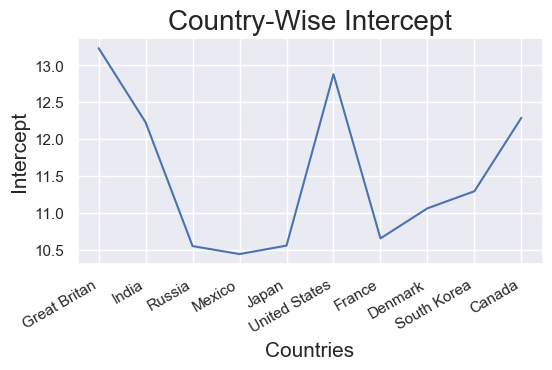

In [326]:
Compare(intercept,'Intercept')

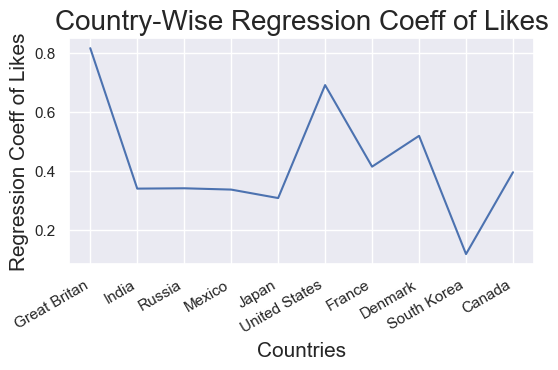

In [327]:
Compare(coeff_likes,'Regression Coeff of Likes')

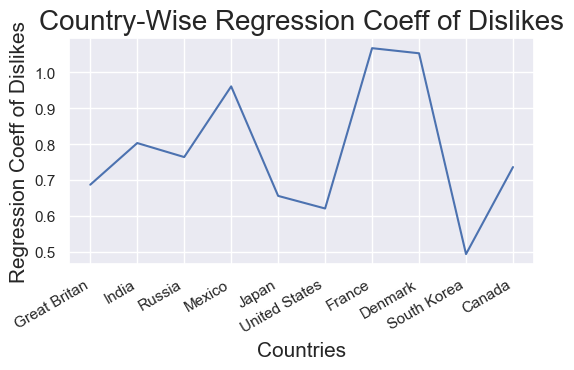

In [328]:
Compare(coeff_dislikes,'Regression Coeff of Dislikes')

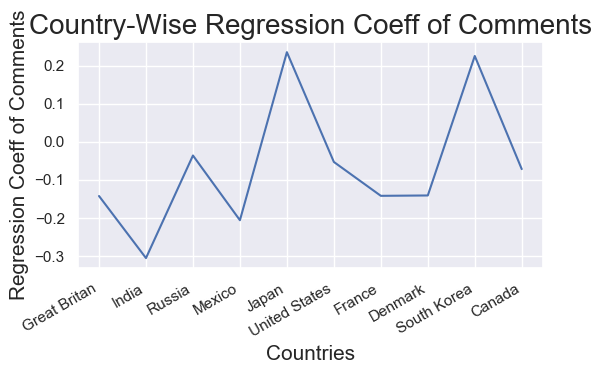

In [329]:
Compare(coeff_comments,'Regression Coeff of Comments')

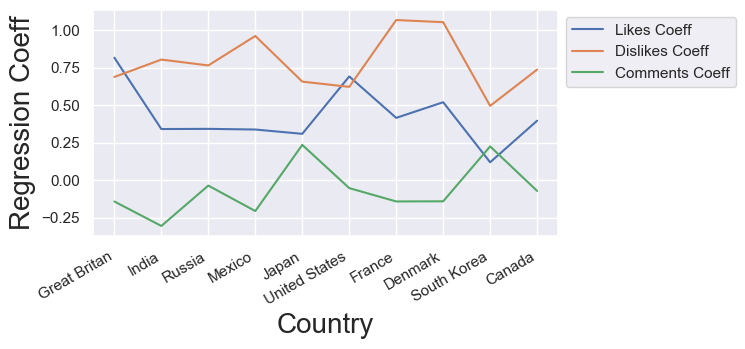

In [330]:
K=[]
for i in range(0,len(countries)):
    K.append(i)
plt.plot(K,coeff_likes, label = "Likes Coeff")
plt.plot(K,coeff_dislikes,label= "Dislikes Coeff")
plt.plot(K,coeff_comments,label= "Comments Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

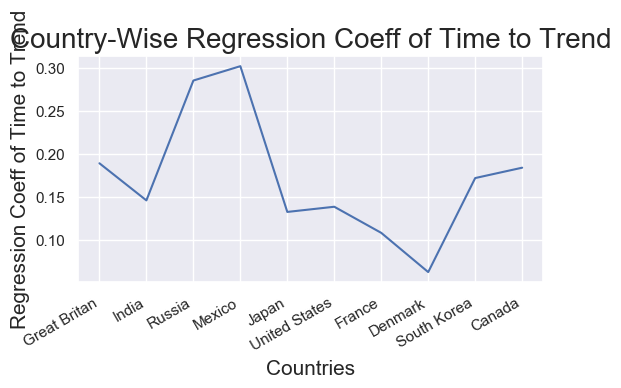

In [331]:
Compare(coeff_timetotrend,'Regression Coeff of Time to Trend')

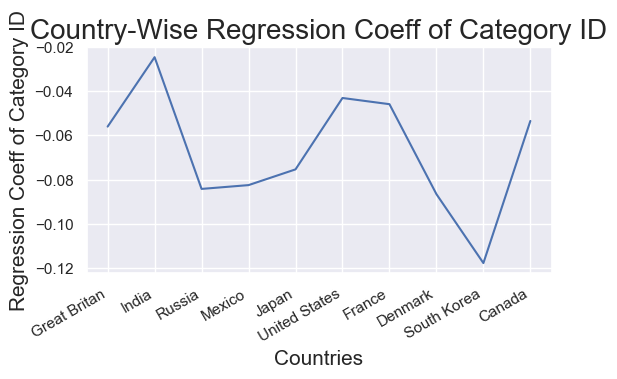

In [332]:
Compare(coeff_categoryid,'Regression Coeff of Category ID')

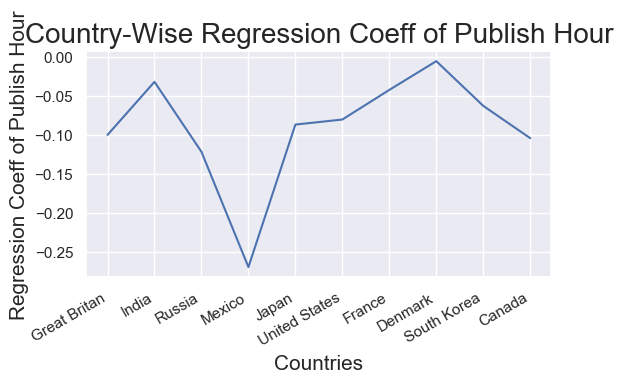

In [333]:
Compare(coeff_hour,'Regression Coeff of Publish Hour')

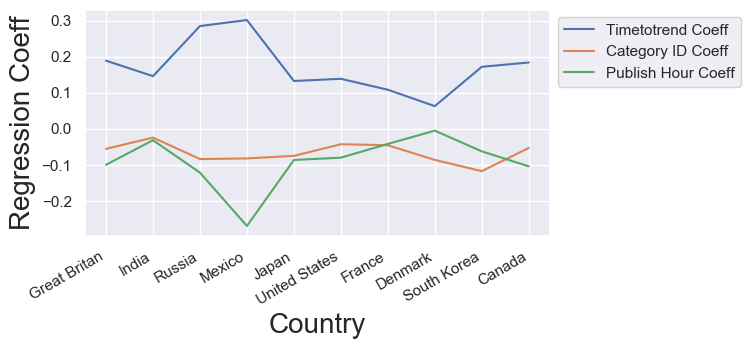

In [334]:
plt.plot(K,coeff_timetotrend, label = "Timetotrend Coeff")
plt.plot(K,coeff_categoryid,label= "Category ID Coeff")
plt.plot(K,coeff_hour,label= "Publish Hour Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# CONFIG

In [335]:
config = [ [50,50] , [60,40], [70,30], [80,20] , [90,10] ]

In [336]:
from sklearn import metrics

In [337]:
mean_absolute = []
mean_squared = []
root_mean_squared = []
def config_test(c):
    testsize = c/100
    
    #Dummy variables for region
    data_config = pd.get_dummies(data_cleaned, drop_first=True)
    
    #Initializing data
    targets = data_config['log_views']
    inputs = data_config.drop(['log_views'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    #TrainTestSplit
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=c, random_state=365)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit( x_train,y_train)
    
    predicted = reg.predict(x_test)
      
    mean_absolute.append( metrics.mean_absolute_error(y_test, predicted))
    mean_squared.append(metrics.mean_squared_error(y_test, predicted))
    root_mean_squared.append(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

In [338]:
for i in config:
    config_test(i[1])

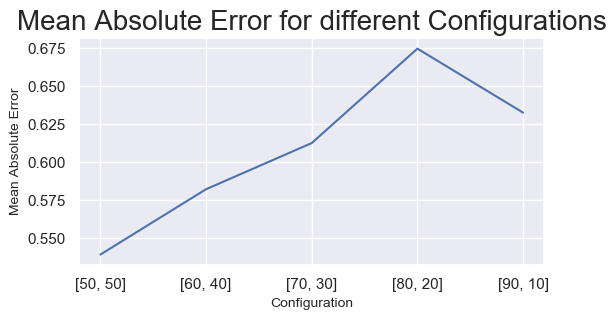

In [339]:
K = [1,2,3,4,5]
plt.plot(K,mean_absolute)
plt.xlabel('Configuration' , fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=10)
plt.title('Mean Absolute Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

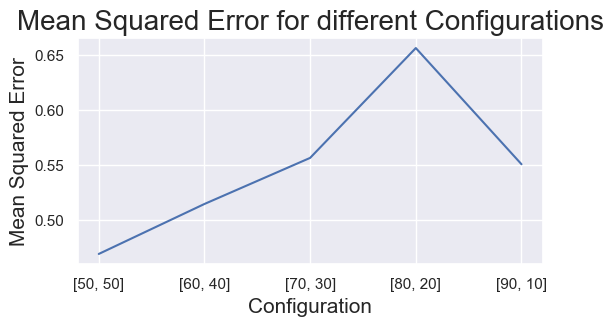

In [340]:
K = [1,2,3,4,5]
plt.plot(K,mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

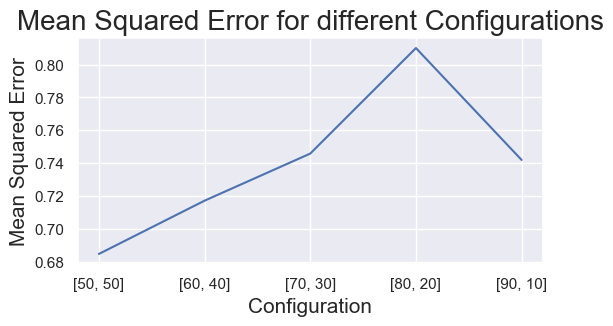

In [341]:
K = [1,2,3,4,5]
plt.plot(K,root_mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

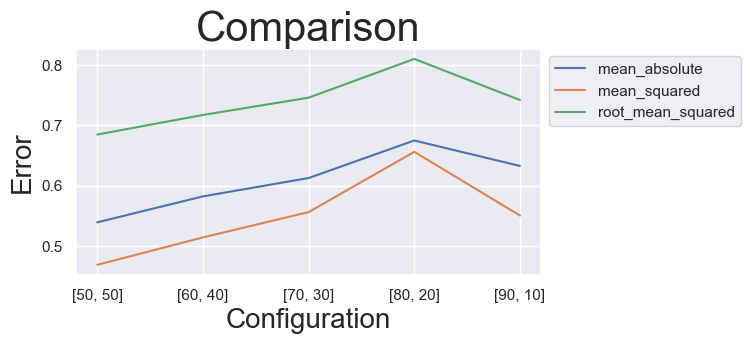

In [342]:
plt.plot(K,mean_absolute, label = "mean_absolute")
plt.plot(K,mean_squared,label= "mean_squared")
plt.plot(K,root_mean_squared,label= "root_mean_squared")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title("Comparison",fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()